In [47]:
from salad.serialize import read
from pathlib import Path
import astropy.table

def load_summary(search_prefix, detector, snr, time_type, search_label, step="filtered"):
    # get recoveries at a certain step
    p = Path(f"/epyc/projects/salad/search/{search_prefix}/DEEP/20190403/A0c/detector_{detector}/snr_{snr}/{time_type}/{search_label}")
    return read(list(p.rglob(f"{step}_summary.pkl"))[0])


def load_fakes(search_prefix, detector):
    p = Path(f"/epyc/projects/salad/search/{search_prefix}/DEEP/20190403/A0c/detector_{detector}")
    return read(list(p.rglob(f"fakes.pkl"))[0])    

def recoveries(search_prefix, detector, snr, time_type, search_label, step="filtered"):
    # get recoveries at a certain step
    p = Path(f"/epyc/projects/salad/search/{search_prefix}/DEEP/20190403/A0c/detector_{detector}/snr_{snr}/{time_type}/{search_label}")
    return read(list(p.rglob(f"{step}_recovery.pkl"))[0])

def expand_mask(mask_plane_dict, mask):
    r = {}
    for k, v in mask_plane_dict.items():
        r[k] = ((mask >> v) & 1) == 1
    return r

def make_object_table(cluster):
    s = cluster.summary
    d = []
    for i in range(len(s['light_curve']['flux'])):
        flux = s['light_curve']['flux'][i]
        sigma = s['light_curve']['sigma'][i]
        mag = s['light_curve']['mag'][i]
        mask = s['light_curve']['mask'][i]
        mpd = s['mask_plane_dict'][i]
        expnum = s['expnum'][i]
        center = cluster.centers[expnum]
        _d = {
            "expnum": expnum,
            "x": center['pix'].getX(),
            "y": center['pix'].getY(),
            "ra": center['wcs'].getLongitude().asDegrees(),
            "dec": center['wcs'].getLatitude().asDegrees(),
            "time": s['time'][i],
            "flux": flux,
            "sigma": sigma,
            "mag": mag,
            "mask": mask,
        }
        _d.update(expand_mask(mpd, mask))
        
        d.append(_d)
    return astropy.table.Table(d)

In [62]:
import matplotlib.pyplot as plt

14621325 7 {7: {'fake': 85, 'total': 85}} 21.73338288560204 -0.009009177869431895 0.030350807916795345


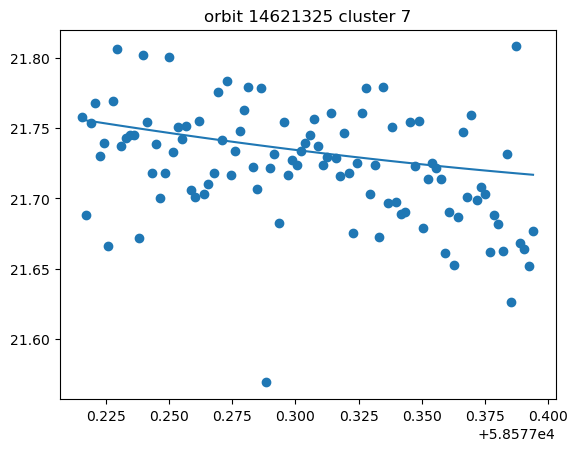

13776855 10 {10: {'fake': 72, 'total': 73}} 23.779416270445495 0.06140172693735657 0.19549012938166993


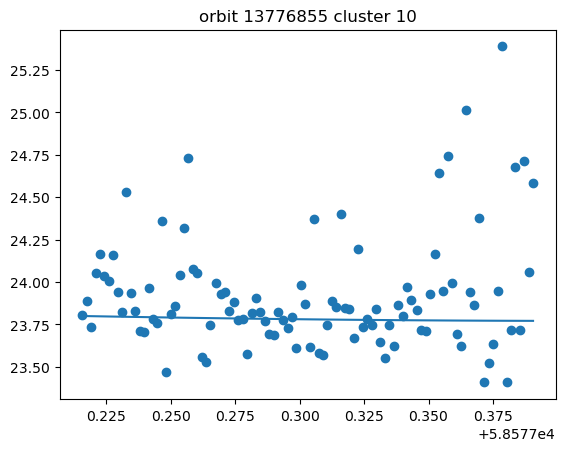

14813564 27 {27: {'fake': 59, 'total': 59}} 24.2008876210054 0.1401703216089949 0.3245504484752229


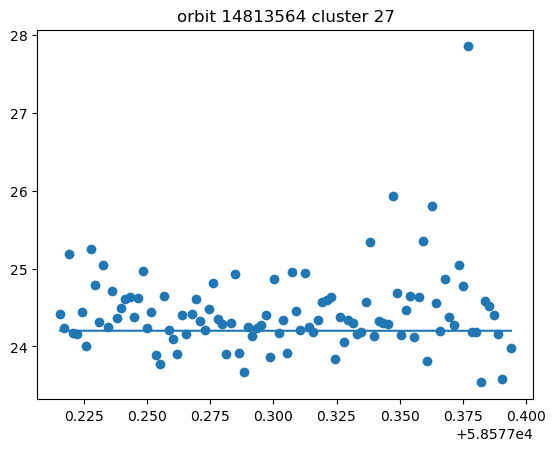

10041343 103 {103: {'fake': 99, 'total': 99}} 22.428969812125573 -0.007809051875051765 0.05417532015644743


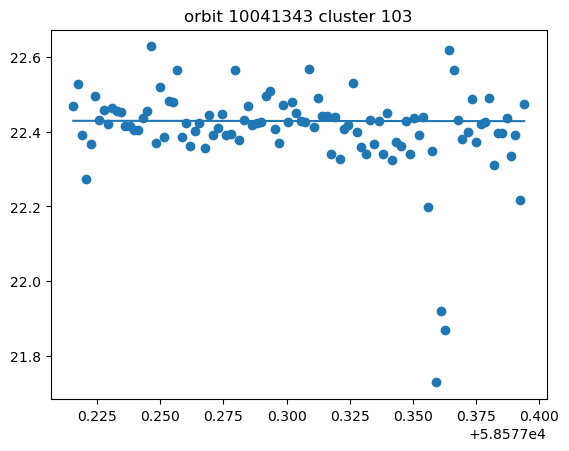

3.0 2
12548062 11 {11: {'fake': 94, 'total': 94}} 23.566052143568612 0.023473978402495987 0.19810191798070761


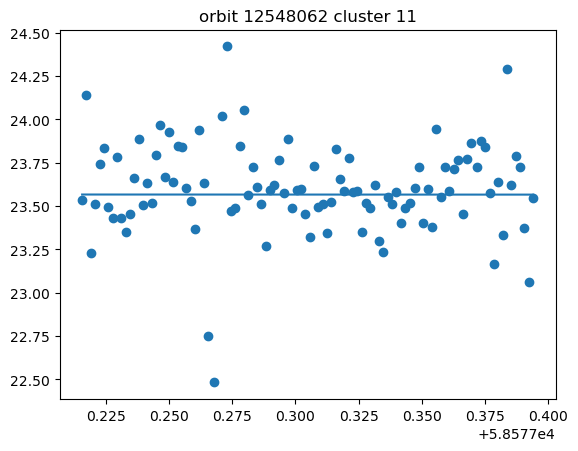

10464147 18 {18: {'fake': 57, 'total': 57}} 20.4898867688618 -0.03586642959744779 0.019216721613960704


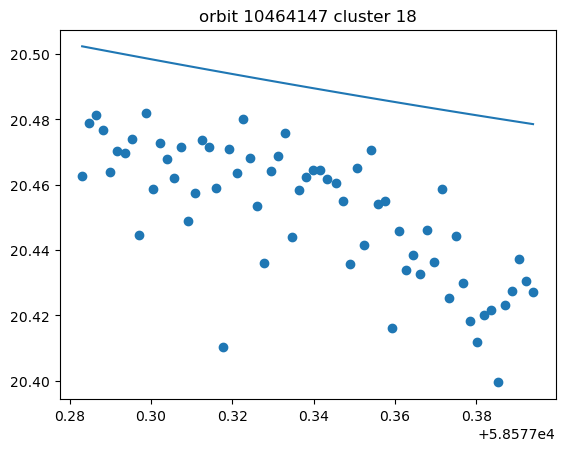

10616324 95 {95: {'fake': 59, 'total': 60}} 23.96710845914751 0.07390304026749561 0.3209258655412309


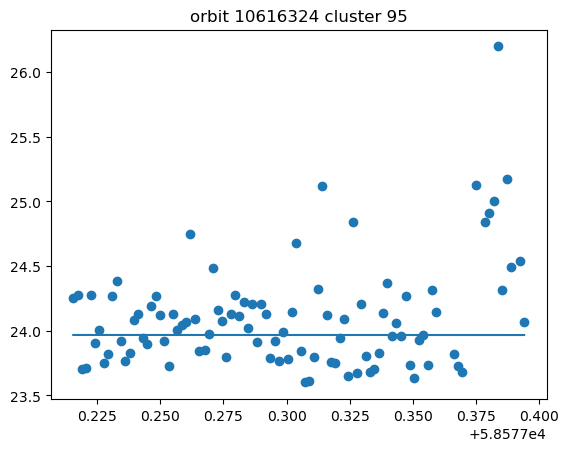

14699459 3 {3: {'fake': 84, 'total': 84}} 20.228985944638985 -0.020573090114702097 0.015911963653002452


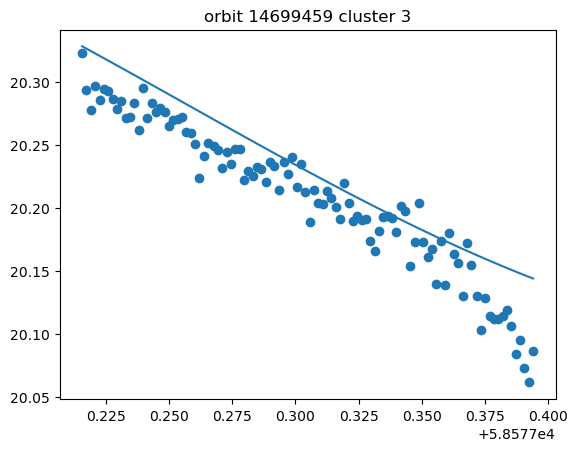

14969959 11 {11: {'fake': 100, 'total': 100}} 20.07949697719932 -0.025175056761916892 0.013636250580536151


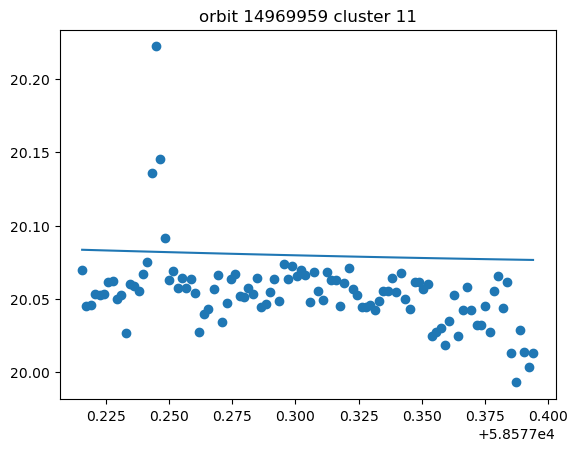

11926129 71 {71: {'fake': 32, 'total': 32}} 24.755975132108603 -0.019538038245766387 0.5794072682513823


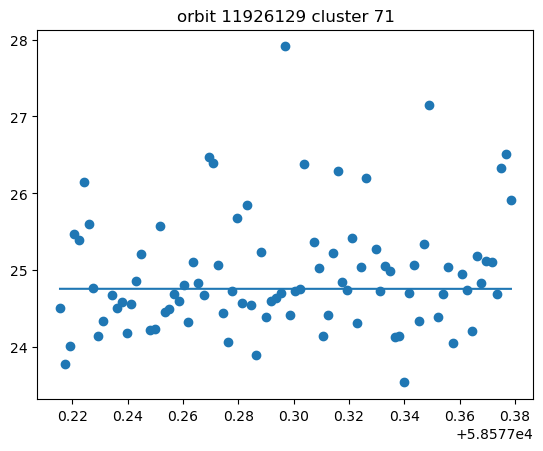

11627514 389 {389: {'fake': 38, 'total': 38}} 24.533054634406376 0.12365779487434736 0.4855807943447991


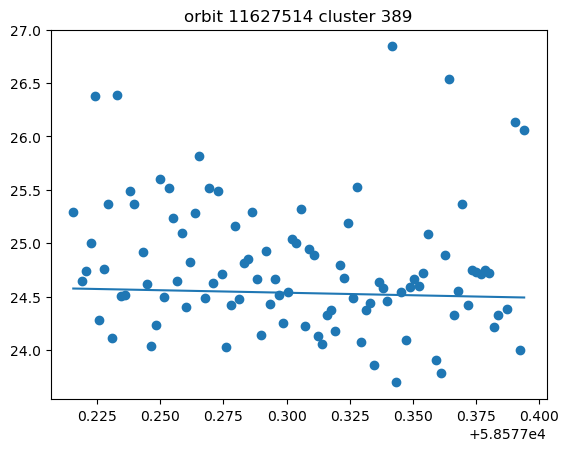

13711875 14 {14: {'fake': 90, 'total': 90}} 20.295647004187312 -0.021213700391493617 0.014263318485984014


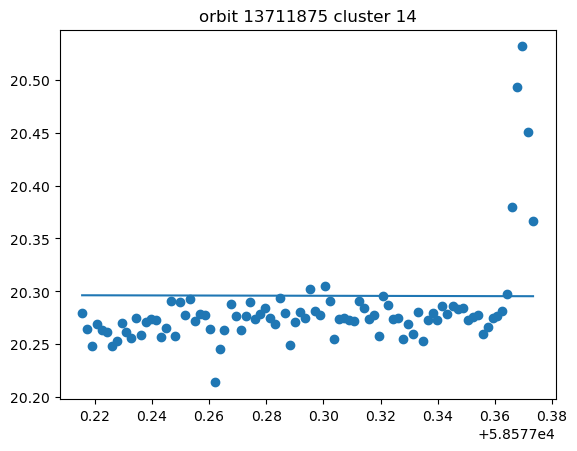

13008433 13 {13: {'fake': 85, 'total': 85}} 24.03701528723974 0.04371922004573037 0.3061435428959049


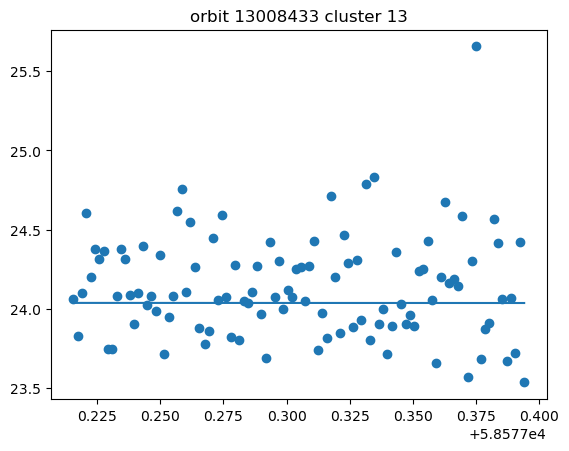

14795314 2 {2: {'fake': 104, 'total': 104}} 22.653672628819855 0.02896515364917107 0.0827723121443274


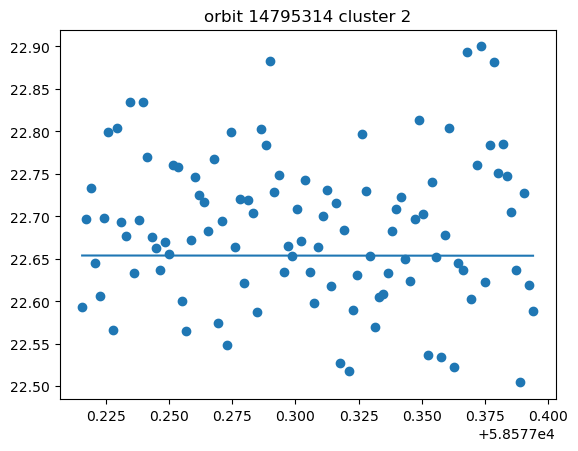

13820098 19 {19: {'fake': 40, 'total': 41}} 24.53022801605469 0.13488847192483888 0.5659564971334241


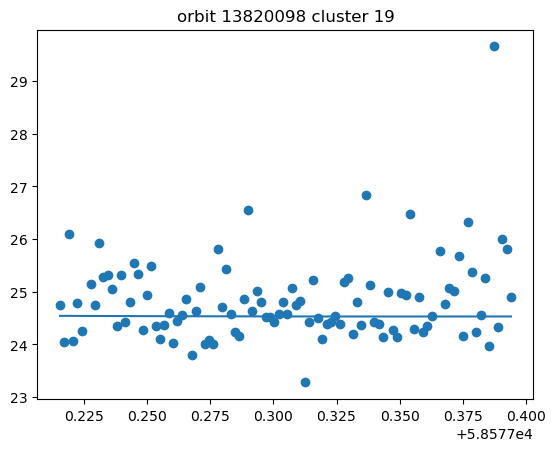

14967241 126 {126: {'fake': 15, 'total': 15}} 25.023892976558276 -0.02381176921682915 0.5888896720263902


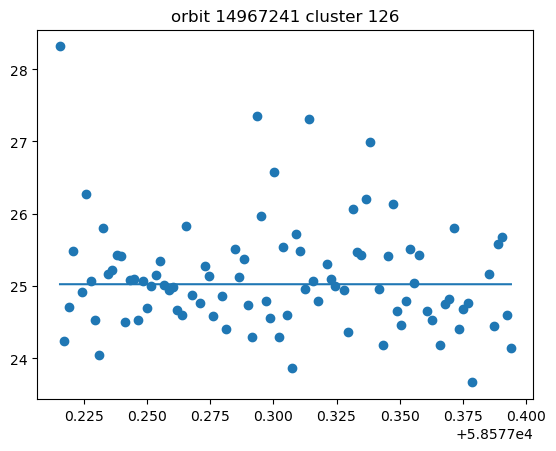

10451789 1 {1: {'fake': 96, 'total': 96}} 23.75451098719642 0.04913470447000634 0.23032712991437912


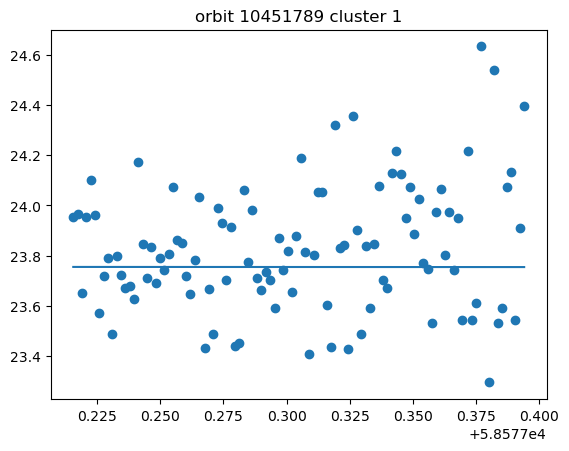

11806786 17 {17: {'fake': 104, 'total': 104}} 21.178256130516015 -0.019054743634987048 0.023318167476027638


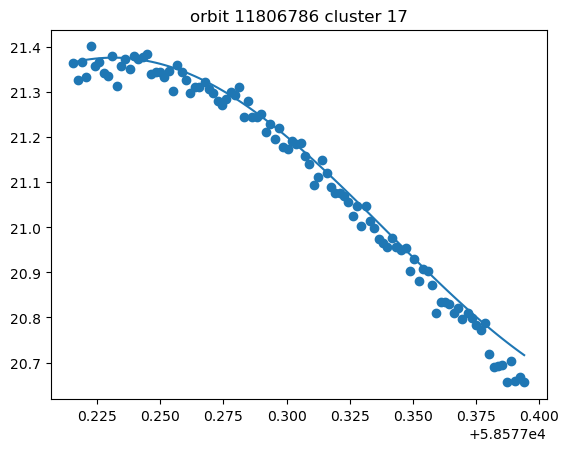

12833859 329 {329: {'fake': 14, 'total': 15}} 25.296952346188572 0.005037378740134102 0.7798974110874877


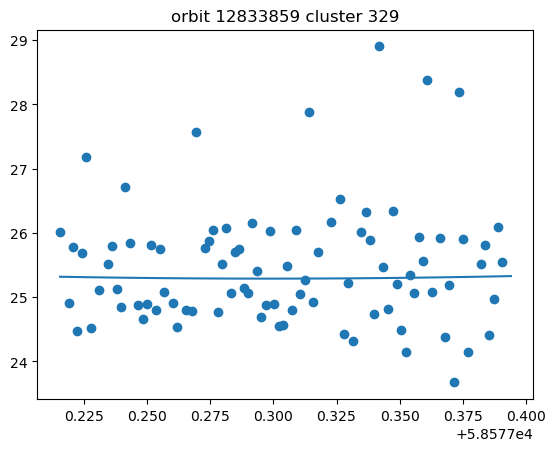

14155046 24 {24: {'fake': 22, 'total': 22}} 24.915834524269535 0.0430014804648593 0.5742392300620371


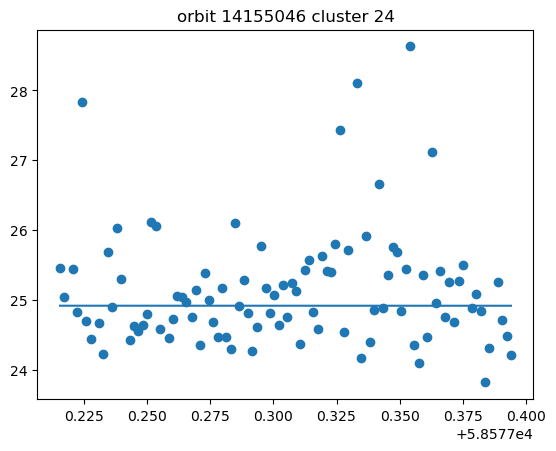

12408907 48 {48: {'fake': 22, 'total': 22}} 24.924930785137157 0.03612882338065759 0.6714602480605434


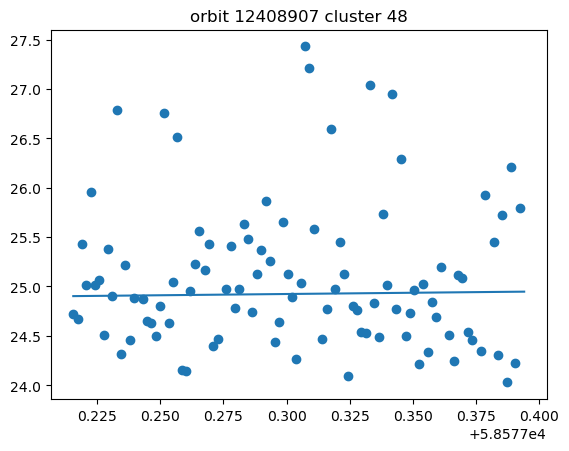

10947186 6 {6: {'fake': 84, 'total': 84}} 24.06392863837116 0.06766186477073965 0.37278305660808175


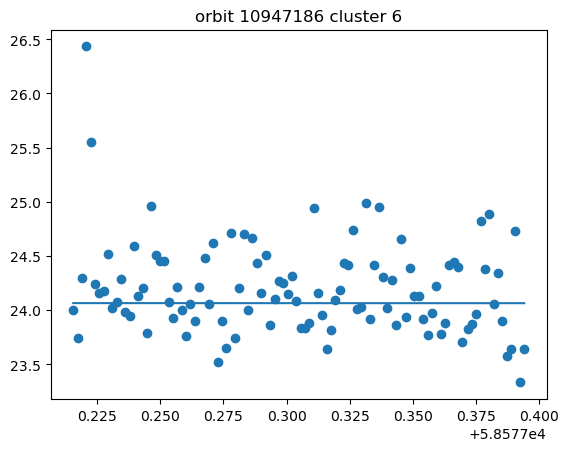

11710336 3 {3: {'fake': 104, 'total': 104}} 21.5483740797511 -0.009663557777043863 0.030403286503961926


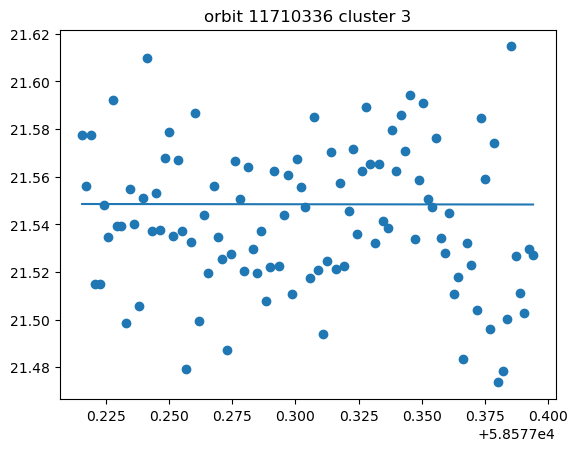

13134736 1 {1: {'fake': 95, 'total': 95}} 23.060525988142977 0.0275353876169806 0.10944379684910102


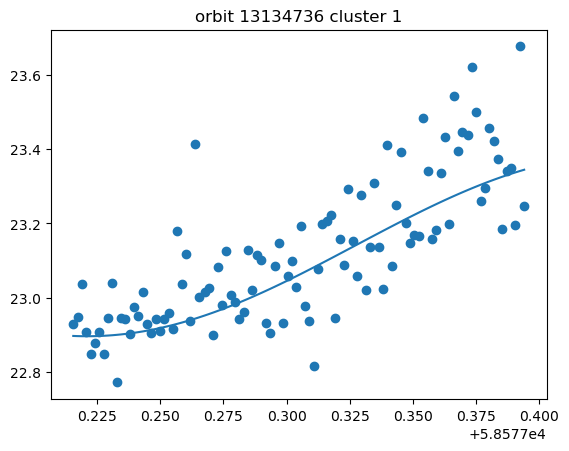

12493471 13 {13: {'fake': 53, 'total': 53}} 24.341516639211555 0.07512502074164473 0.40324535301693853


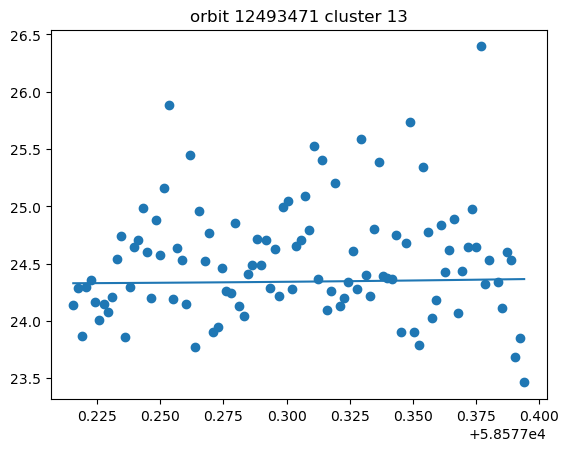

10619295 2 {2: {'fake': 102, 'total': 102}} 23.462583492125738 0.03679670375529476 0.20069919882323256


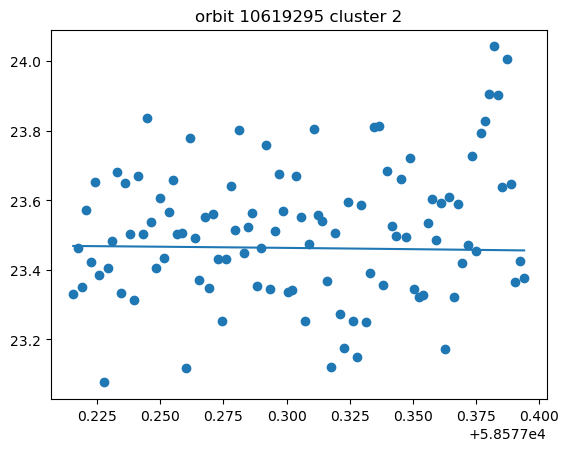

11191222 6 {6: {'fake': 96, 'total': 96}} 23.708598539007387 0.04160457611717838 0.21810037568767016


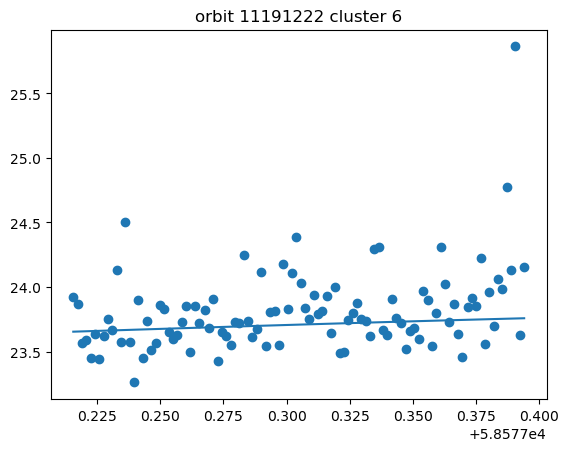

13168109 9 {9: {'fake': 83, 'total': 83}} 23.861433307416853 0.010894599536845462 0.23663240260675208


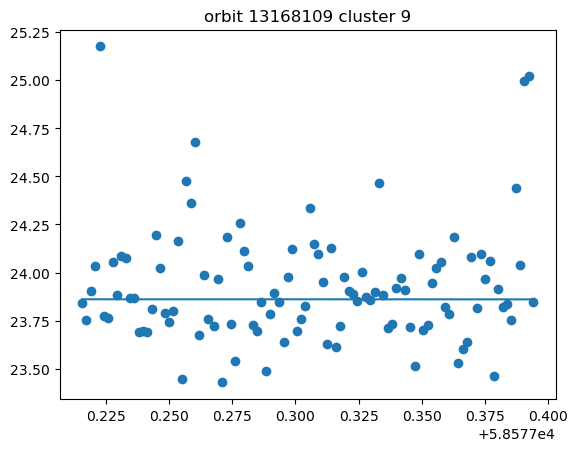

12040355 560 {560: {'fake': 43, 'total': 44}} 24.556330730418985 0.044400958883151986 0.4149149121094952


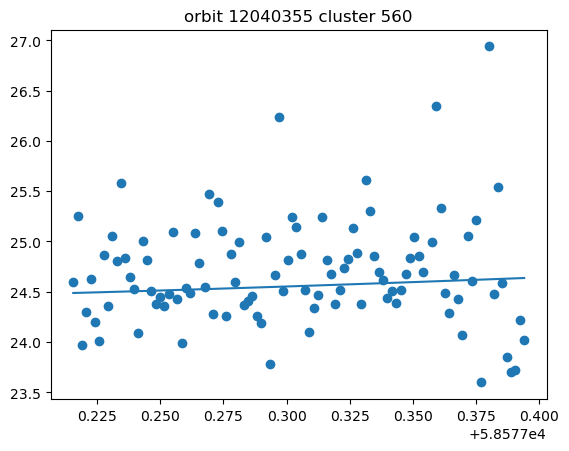

12371832 17 {17: {'fake': 62, 'total': 62}} 20.998737077386963 -0.01638353612008281 0.018589720085892453


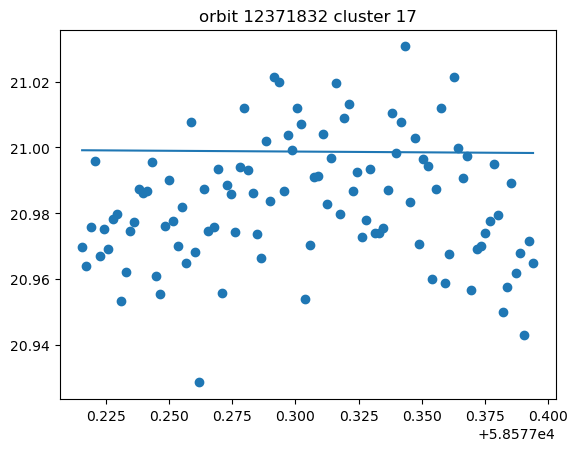

14008448 24 {24: {'fake': 23, 'total': 23}} 24.81219644397579 0.179567738186158 0.742111108377523


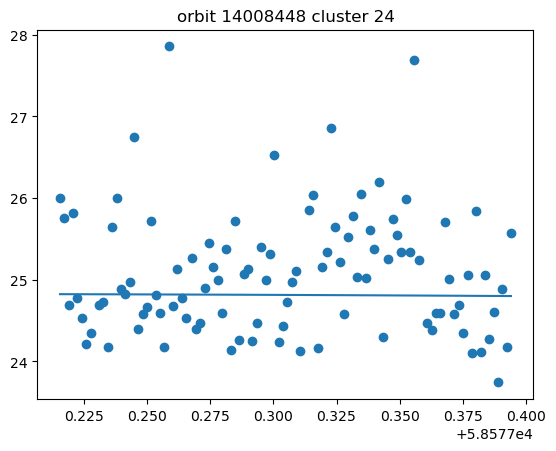

10816885 12 {12: {'fake': 59, 'total': 59}} 23.50763122806732 0.03276044628584529 0.19744381976096417


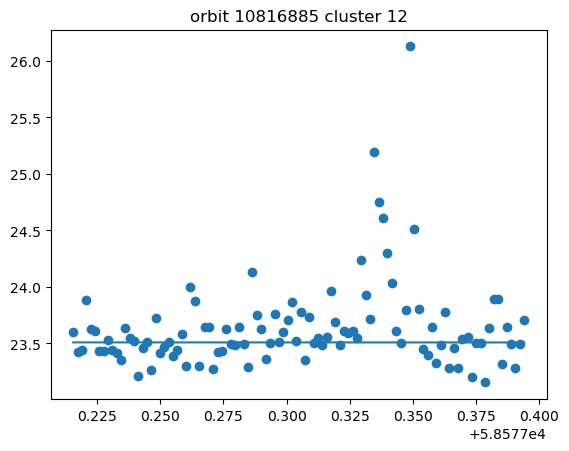

13937287 4 {4: {'fake': 104, 'total': 104}} 23.266655609297807 -0.004320630836238237 0.1387081596995881


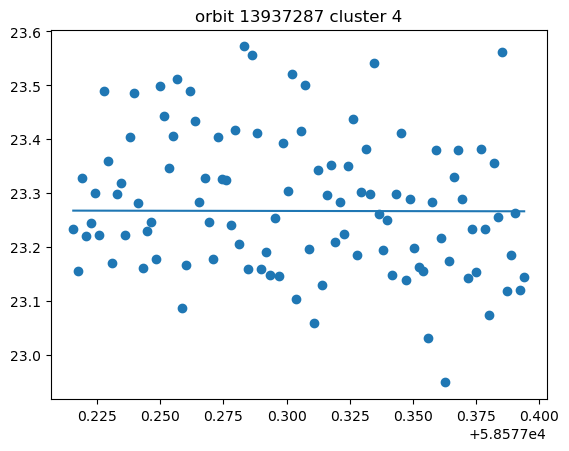

12702366 13 {13: {'fake': 73, 'total': 73}} 24.129793841969104 0.04411969059515819 0.2719157773131918


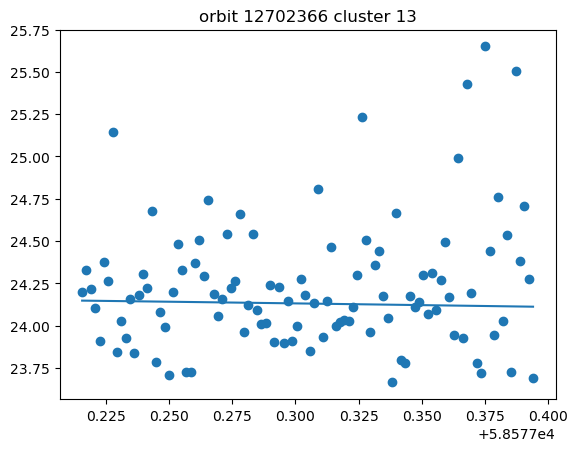

11154462 5 {5: {'fake': 102, 'total': 102}} 23.47380315358717 0.019642741690082843 0.18072505040406353


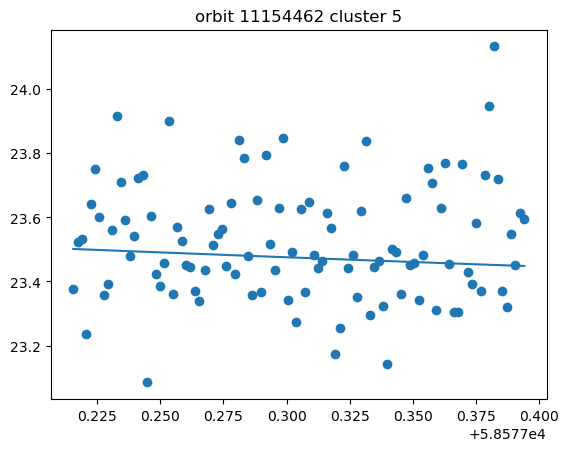

12762350 46 {46: {'fake': 69, 'total': 69}} 23.816513997025723 0.06254124996486787 0.2293707769848251


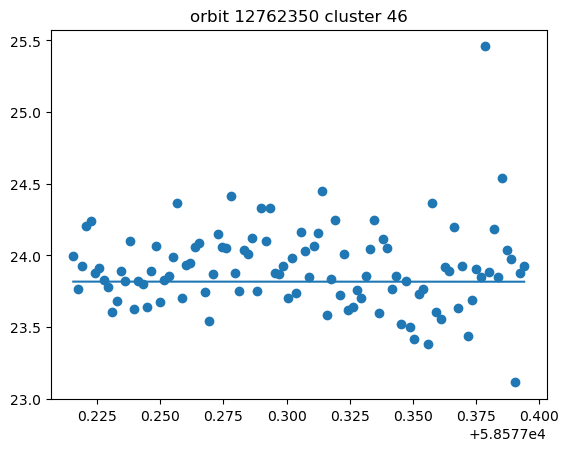

14375182 16 {16: {'fake': 98, 'total': 98}} 23.22740005381167 0.03412845843400625 0.14737453661570588


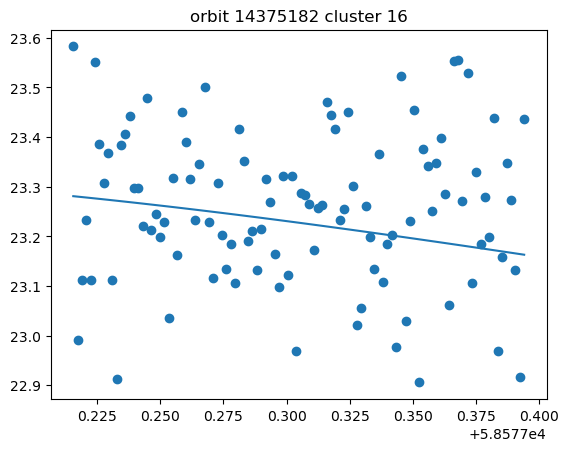

11434645 489 {489: {'fake': 39, 'total': 39}} 21.473625605532334 -0.021517368137079274 0.029635655249581446


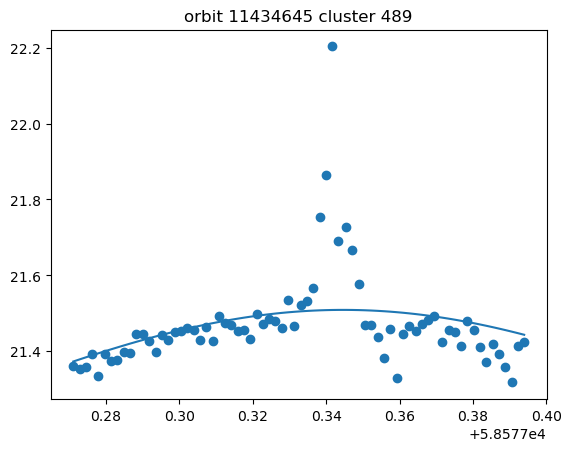

13182422 4 {4: {'fake': 92, 'total': 92}} 21.2224746887965 -0.01442929223088818 0.023607688606957358


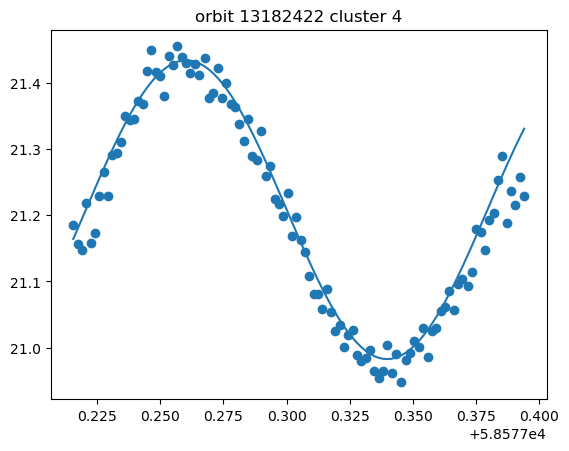

11031938 23 {23: {'fake': 49, 'total': 49}} 24.070550287449084 -0.005043638932406225 0.38519296488103777


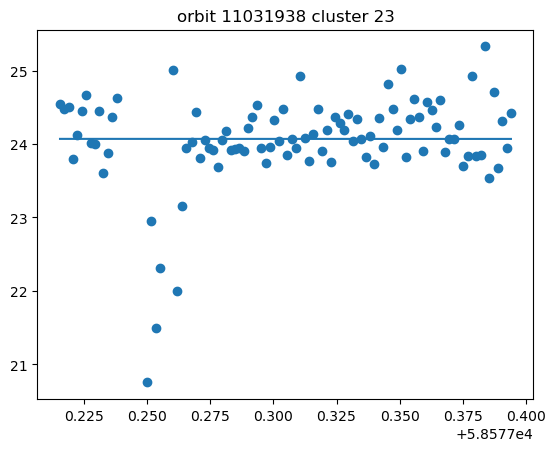

13803141 24 {24: {'fake': 81, 'total': 82}} 24.09008752793936 0.060689843052733394 0.30233644776003504


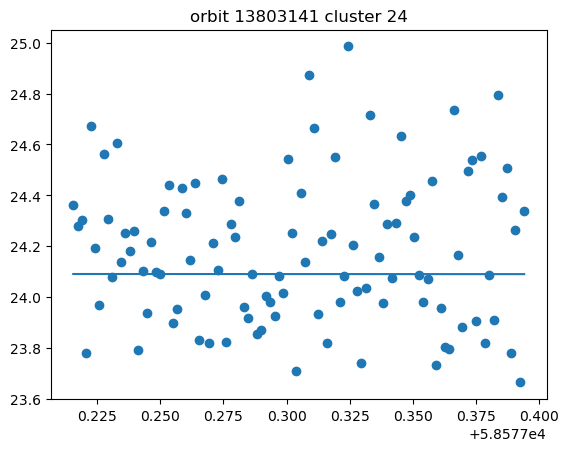

14021599 44 {44: {'fake': 46, 'total': 46}} 23.94060521981809 0.02906637159173009 0.34829187369936476


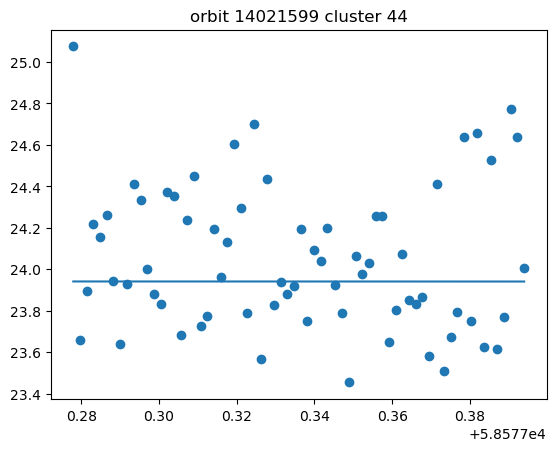

12028958 14 {14: {'fake': 75, 'total': 75}} 24.067700274031857 0.09225398951758912 0.26381950878153976


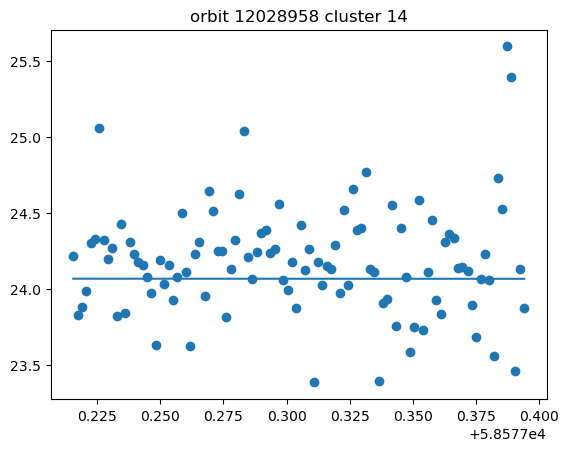

13702825 11 {11: {'fake': 85, 'total': 85}} 22.39527919331976 0.01491755966601005 0.08298497178217376


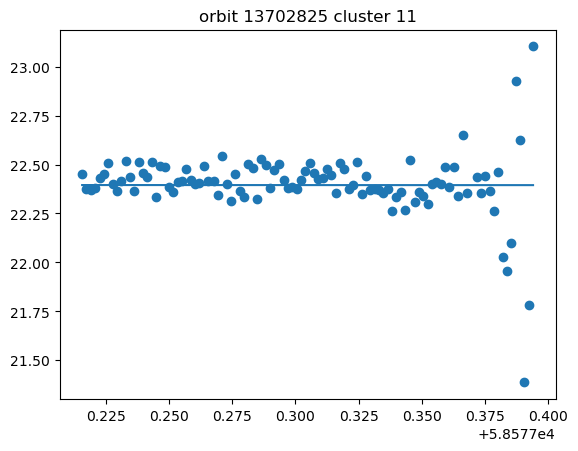

14929644 144 {144: {'fake': 95, 'total': 95}} 18.84022537488826 -0.029721611414309734 0.008574837180160177


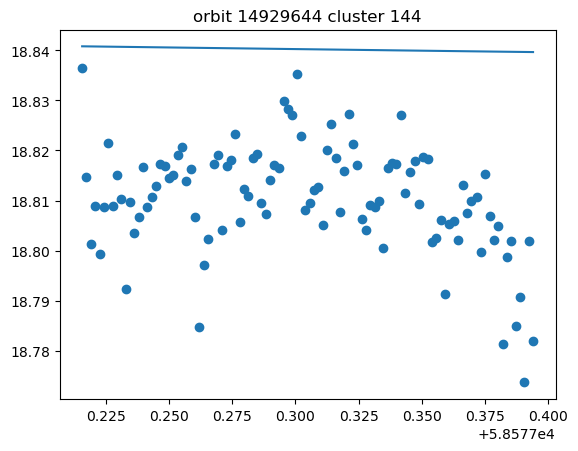

11074514 13 {7: {'fake': 2, 'total': 91}, 13: {'fake': 99, 'total': 99}} 18.15873786638138 -0.0312816638783584 0.007780945855073976


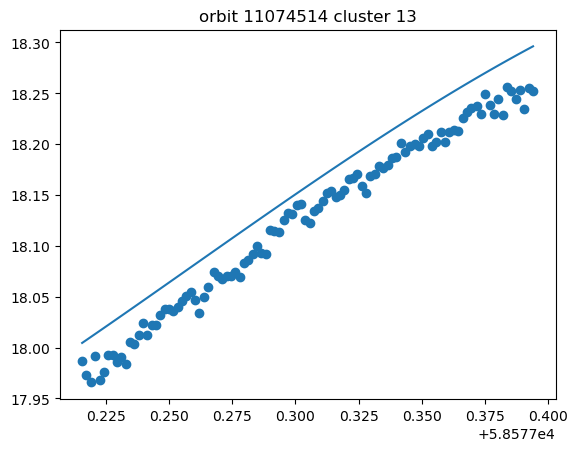

13913300 6 {6: {'fake': 101, 'total': 101}} 23.05921344121652 0.008107295258321656 0.1147822954566442


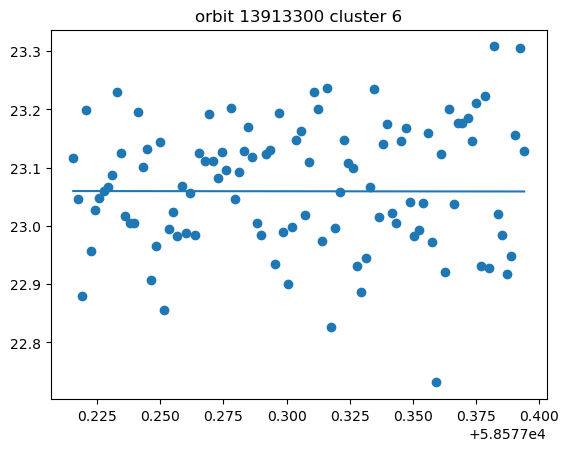

13881924 26 {26: {'fake': 45, 'total': 45}} 24.545260280484584 0.053632581503546106 0.4248591089676897


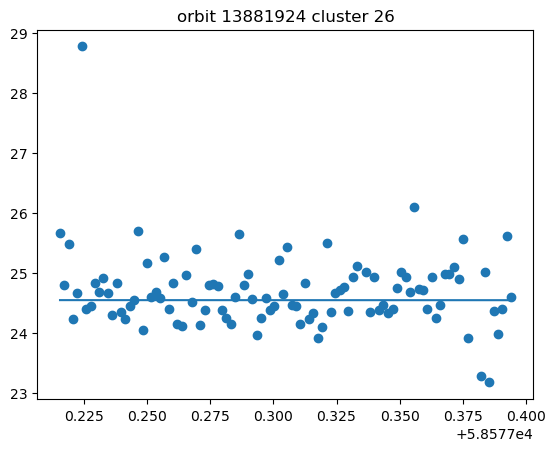

13148814 25 {25: {'fake': 14, 'total': 15}} 24.78691882719133 0.43932790560490886 0.8319527266775816


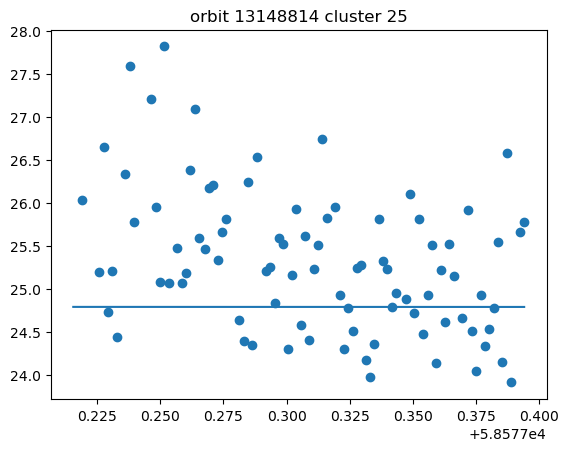

13620703 19 {19: {'fake': 34, 'total': 35}} 24.74184758369777 0.04950524537381895 0.523230677502737


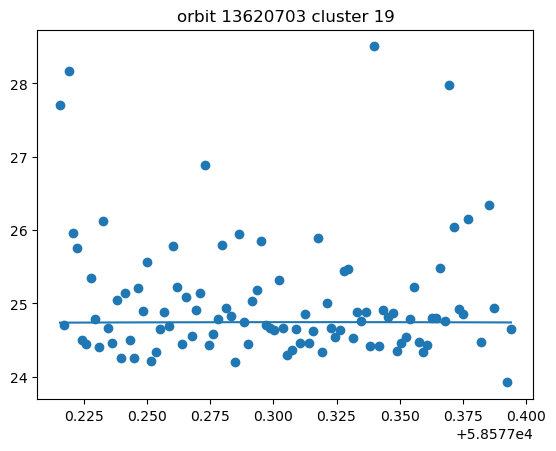

11597961 5 {5: {'fake': 101, 'total': 101}} 22.719496916631062 -0.011152458021649991 0.07216384531069638


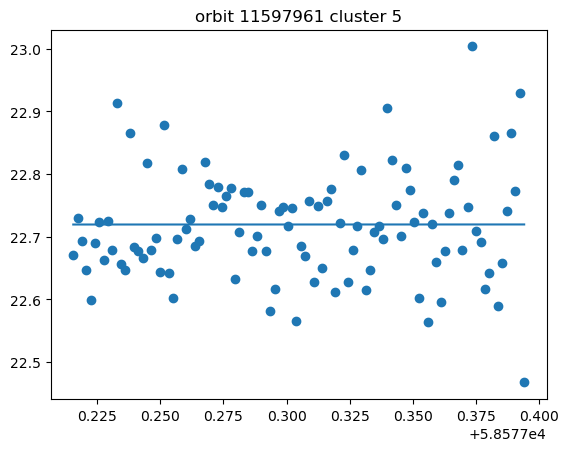

10995599 3 {3: {'fake': 100, 'total': 100}} 23.65501100125571 0.03720163493966311 0.21813869134138286


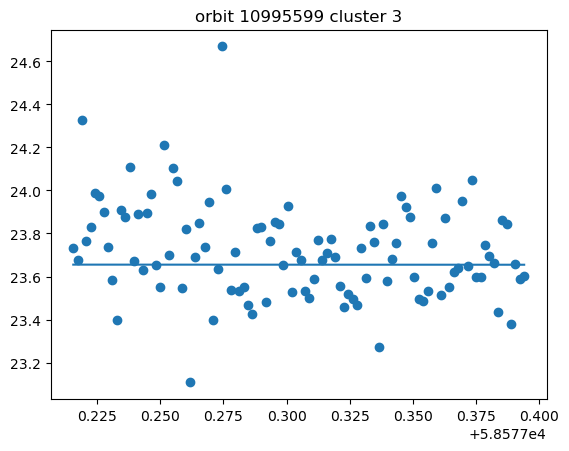

14329972 11 {11: {'fake': 99, 'total': 99}} 19.99681733385872 -0.026269888843783562 0.012500504089579085


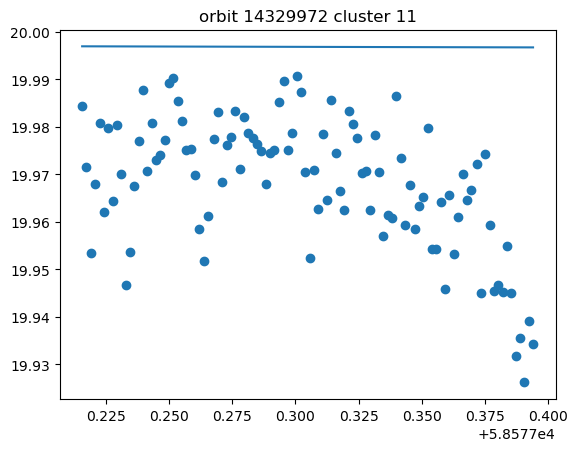

10482592 1 {1: {'fake': 102, 'total': 102}} 23.52816010789732 0.0006056828324911834 0.15396090676277066


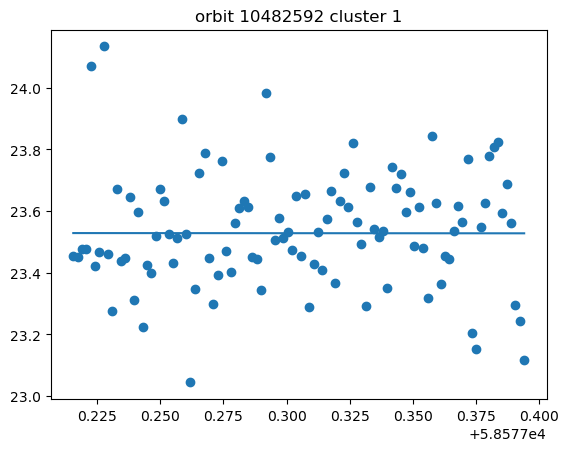

14465007 39 {39: {'fake': 47, 'total': 48}} 24.567508556417266 0.16208038771284627 0.5832535325641743


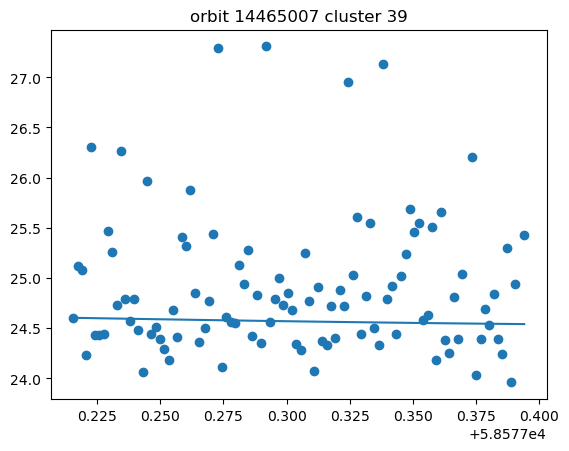

12779770 73 {73: {'fake': 94, 'total': 94}} 23.331228787788206 0.05064555969075002 0.14548126485750973


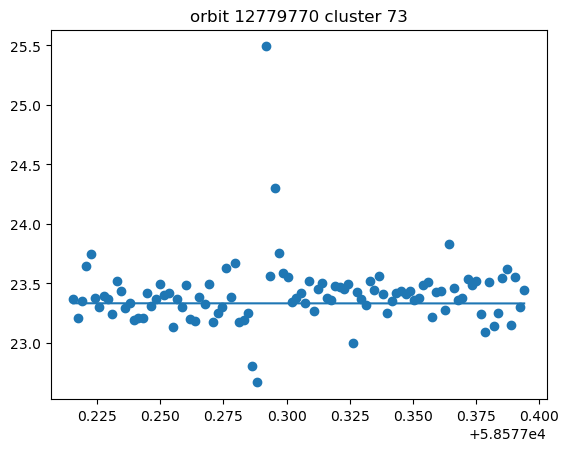

13700317 9 {9: {'fake': 103, 'total': 103}} 21.02597701612023 -0.027815851858312257 0.021391677178295897


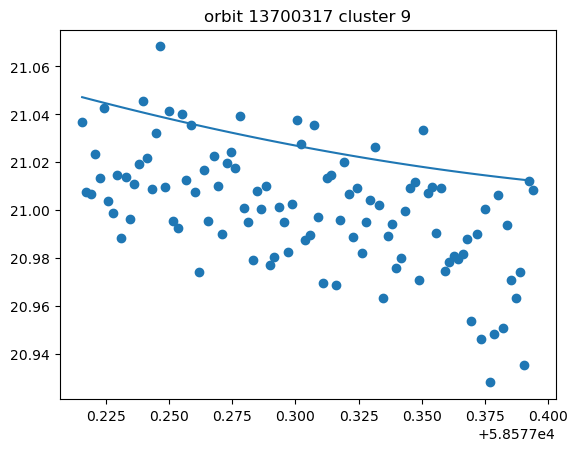

11728902 322 {322: {'fake': 28, 'total': 28}} 23.08387028011662 0.03205777061472581 0.10502511855022674


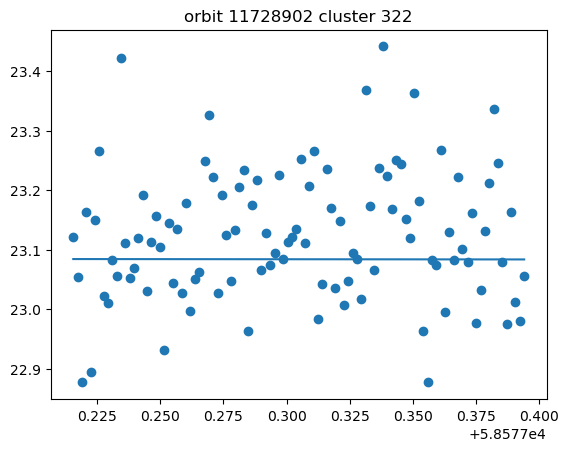

10580828 434 {434: {'fake': 17, 'total': 17}} 22.6955677416377 -0.013704842131783579 0.1335868079614462


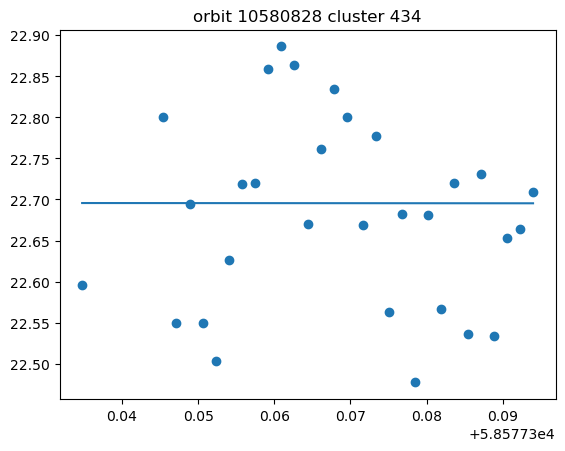

13309462 25 {25: {'fake': 104, 'total': 104}} 21.264877910690647 -0.02949756861764108 0.023555487921926337


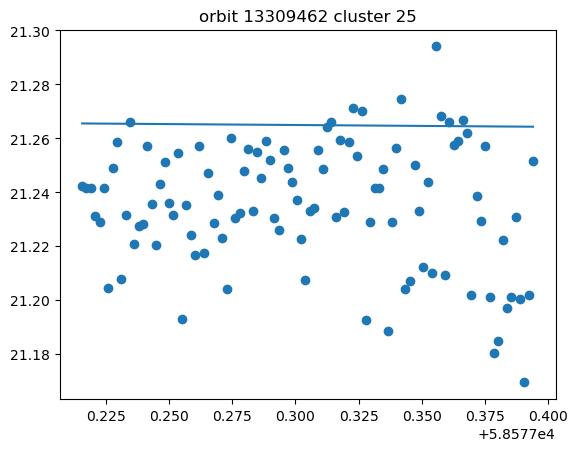

11376828 13 {13: {'fake': 89, 'total': 89}} 21.71234278286913 -0.024828828368823608 0.03249973563151077


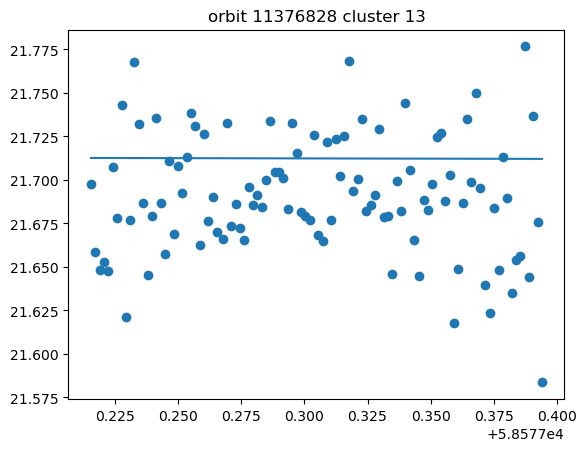

12759912 41 {41: {'fake': 102, 'total': 102}} 21.184090772488553 -0.023449447270339263 0.02328612605746965


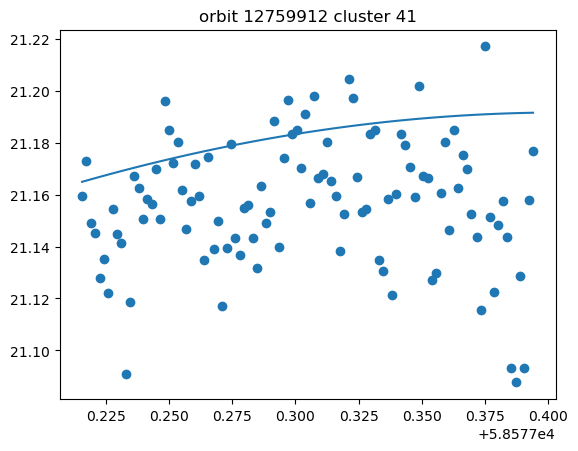

10129264 0 {0: {'fake': 103, 'total': 103}} 22.674934174342177 -0.00567365900888106 0.06030438309394112


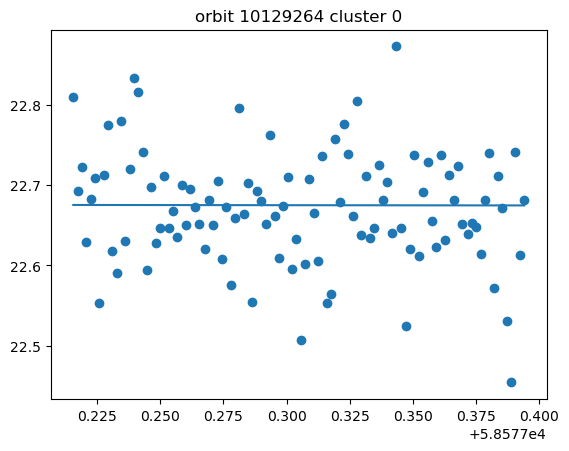

10887476 825 {825: {'fake': 46, 'total': 46}} 23.04962714148966 -0.013687319173541823 0.14297302382578564


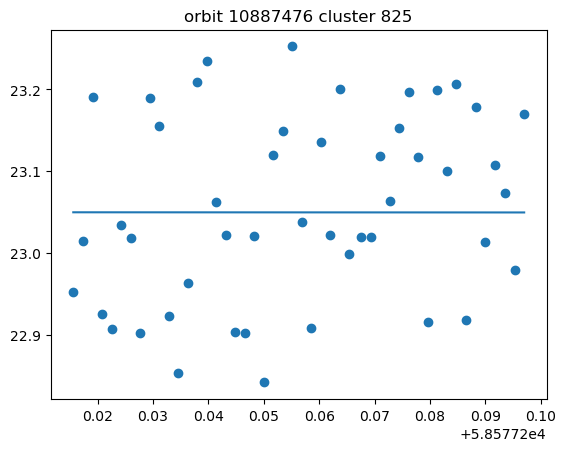

10311420 57 {57: {'fake': 38, 'total': 39}} 23.504543388642027 0.028761789091237944 0.21294401704794585


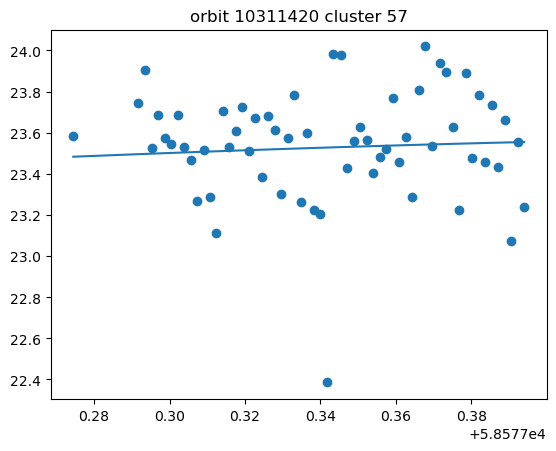

11980646 14 {14: {'fake': 62, 'total': 63}} 23.76402006284585 0.02007727342790311 0.25232710472134556


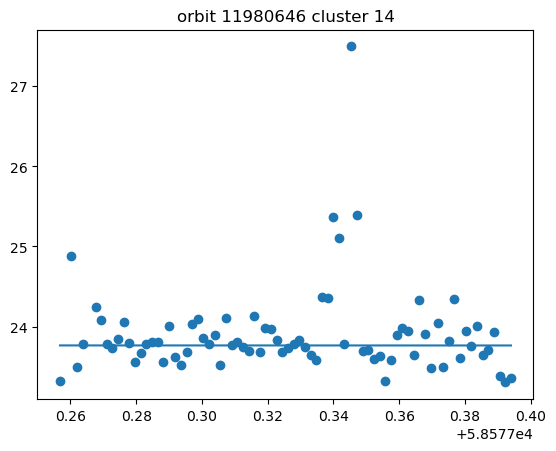

11753255 27 {27: {'fake': 79, 'total': 79}} 22.395870143800156 -0.008987679301050377 0.048658694281597754


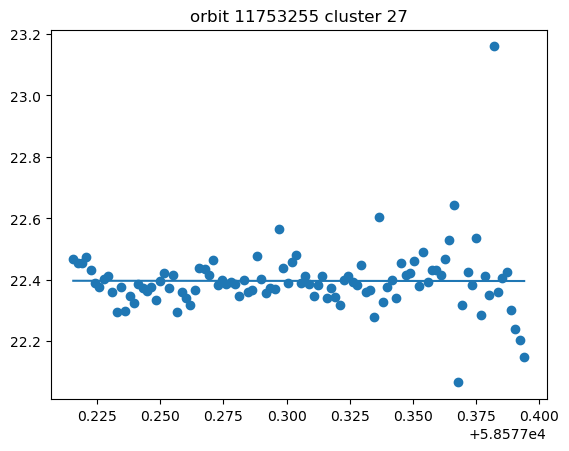

11850664 16 {16: {'fake': 40, 'total': 42}} 24.665927285359576 -0.06607402304381971 0.39974246513842987


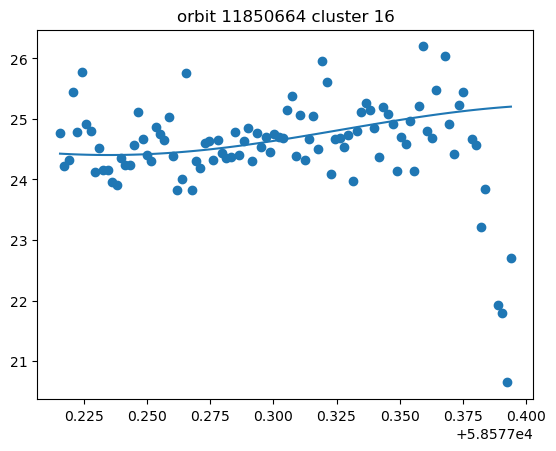

14146093 2 {2: {'fake': 90, 'total': 90}} 23.699498690335375 0.03143952096527336 0.16620609513611426


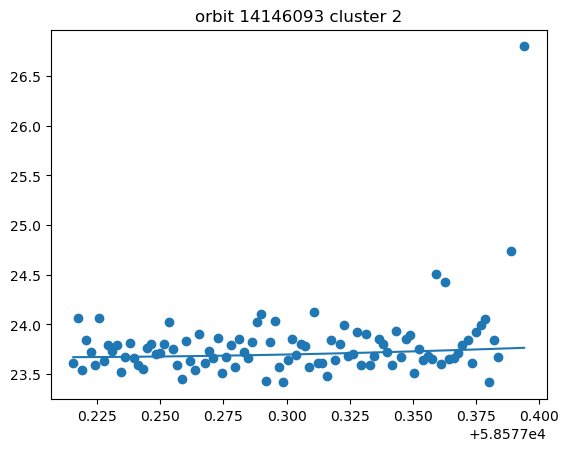

13314392 49 {49: {'fake': 97, 'total': 97}} 18.926569920546648 -0.032463341952148284 0.008429471087410174


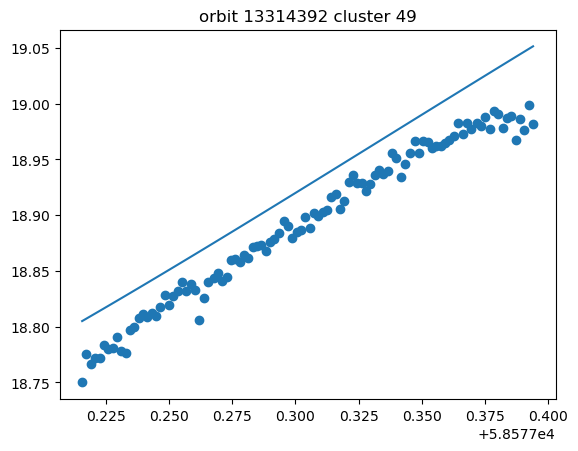

10831422 34 {34: {'fake': 82, 'total': 82}} 22.459399834723364 -0.00040931107246500176 0.0501257772508618


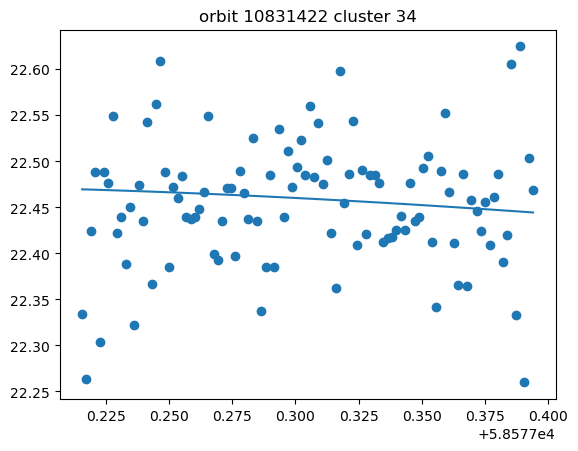

10898849 10 {10: {'fake': 88, 'total': 88}} 23.90787827966826 0.05391230899113886 0.3325336311139867


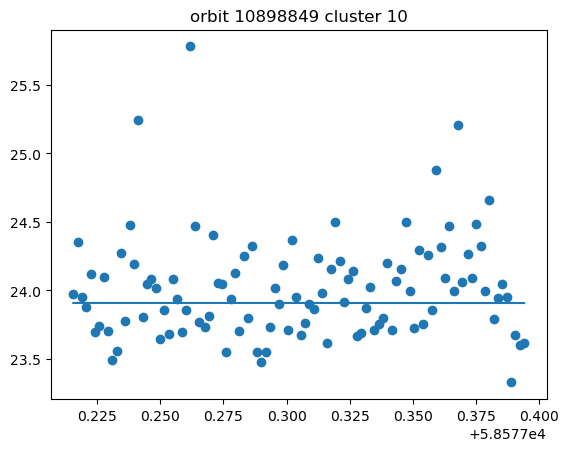

12742730 12 {12: {'fake': 86, 'total': 86}} 23.993119968422242 0.07733694049818673 0.25796720099818315


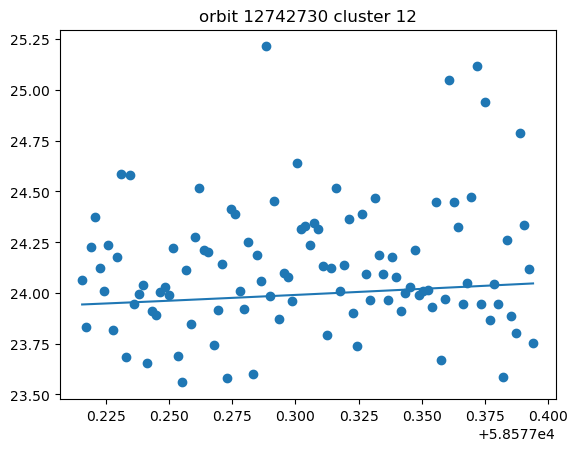

12670973 2 {2: {'fake': 104, 'total': 104}} 23.294986738985237 0.032257013535202717 0.12681399692637013


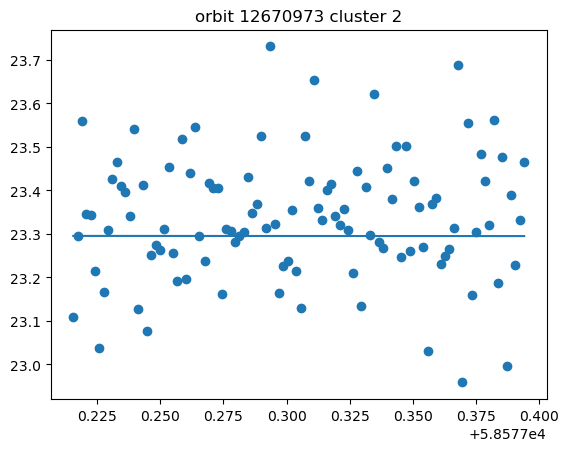

11705025 2 {2: {'fake': 100, 'total': 100}} 23.669040680242368 0.011768373723420211 0.16098062870134933


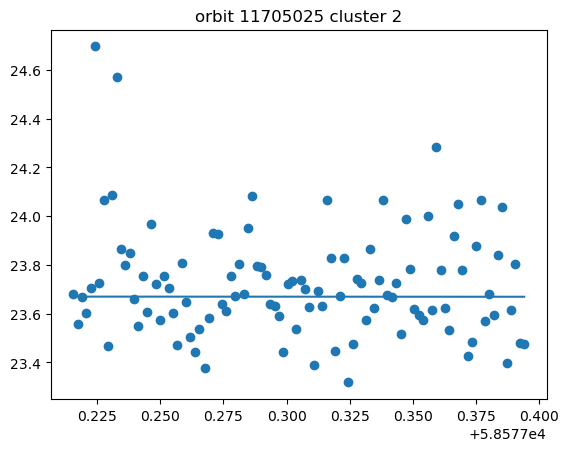

11886435 4 {4: {'fake': 104, 'total': 104}} 23.003636828094272 0.05650311255852358 0.08392119967245794


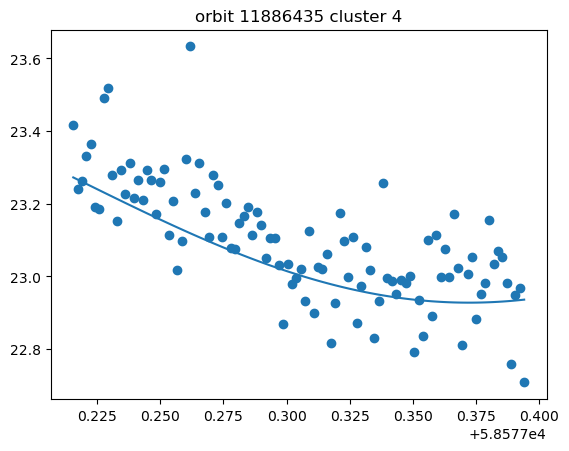

12408037 58 {58: {'fake': 35, 'total': 37}} 24.640770810720696 0.05067699233926248 0.43575968144367755


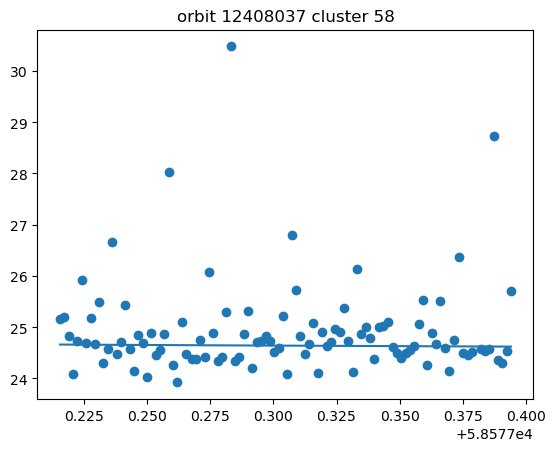

11830438 9 {9: {'fake': 93, 'total': 93}} 23.25101062150393 0.0563896730759037 0.15597031306433612


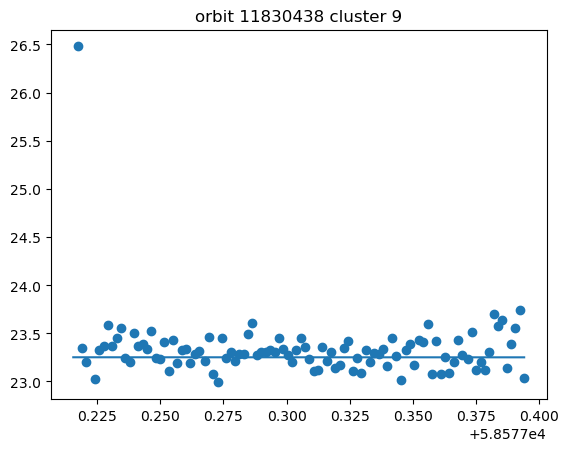

14637857 2 {2: {'fake': 95, 'total': 95}} 23.28655017895084 0.02450573630125774 0.1622934612804567


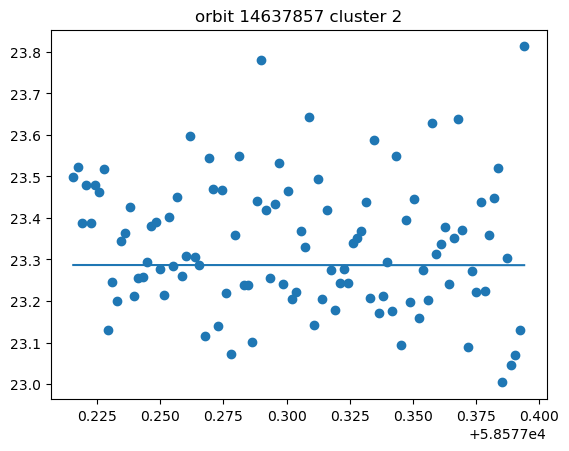

10580756 226 {226: {'fake': 59, 'total': 59}} 22.69131153993914 -0.0078174356437124 0.07206369403217411


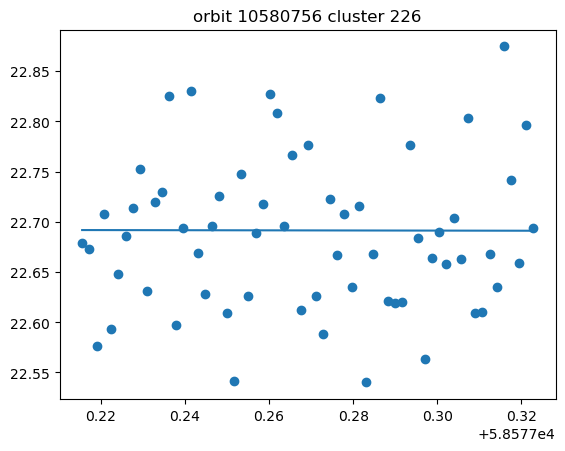

10198848 13 {13: {'fake': 42, 'total': 45}} 23.55203109034497 0.08447828027070337 0.22244624889007447


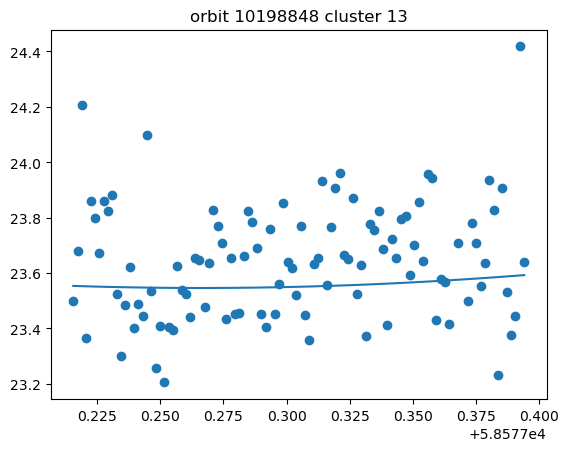

12959106 11 {11: {'fake': 94, 'total': 94}} 20.363360750693623 -0.03235661966457393 0.012543118637322626


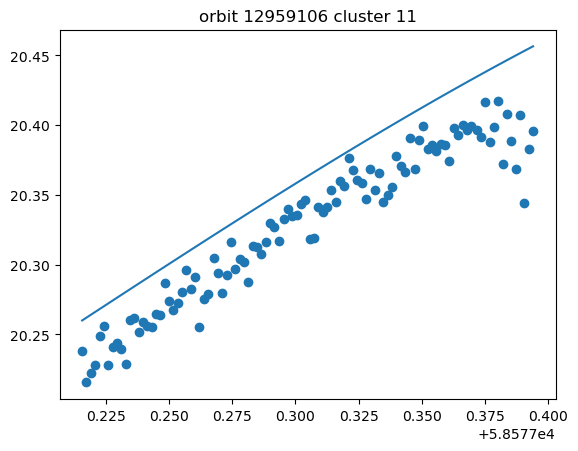

10049768 204 {204: {'fake': 24, 'total': 24}} 24.739678663254164 0.1898669077906323 0.5766043599899418


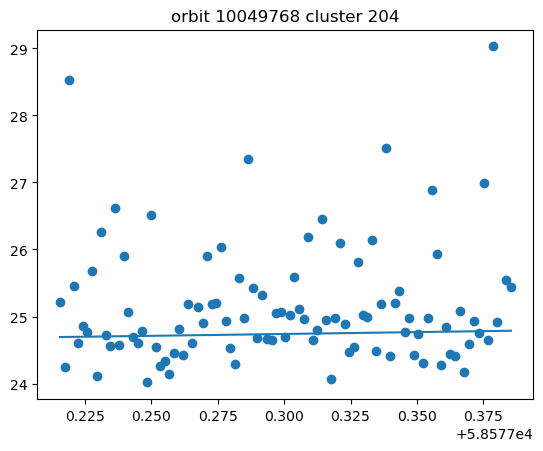

10863339 131 {131: {'fake': 26, 'total': 26}} 24.825896135562367 0.04166948033715734 0.3825659188899865


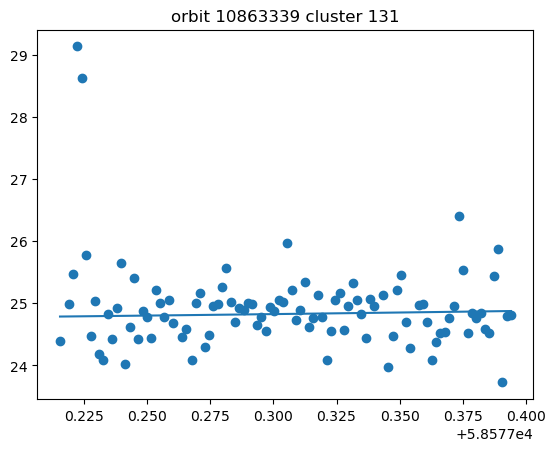

12689843 298 {298: {'fake': 103, 'total': 103}} 19.761768435463765 -0.03933740397862984 0.011118809295663902


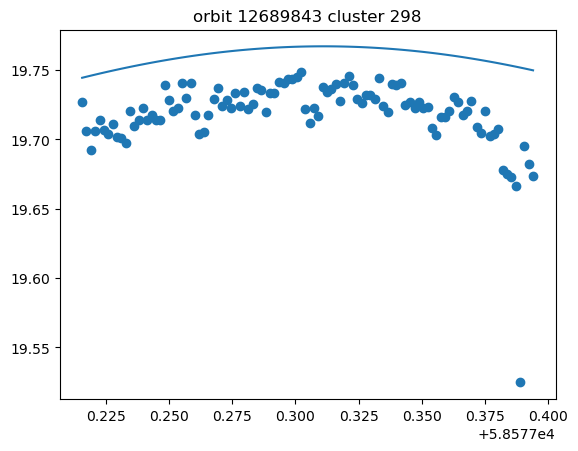

10275777 5 {5: {'fake': 91, 'total': 91}} 23.810787425490908 0.03226716754519643 0.24290299762962786


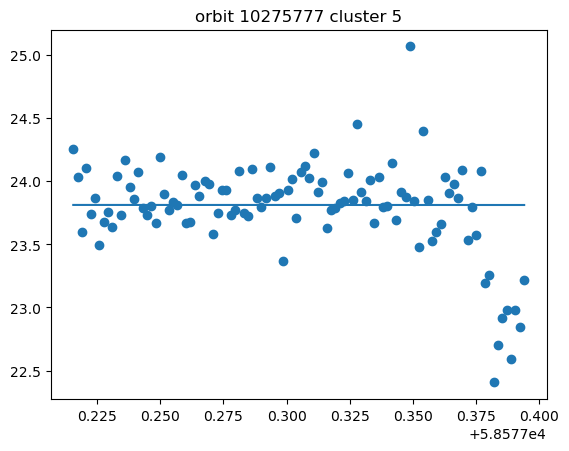

12570570 4 {4: {'fake': 81, 'total': 81}} 23.562284703923325 0.04750587423880326 0.1837417740943646


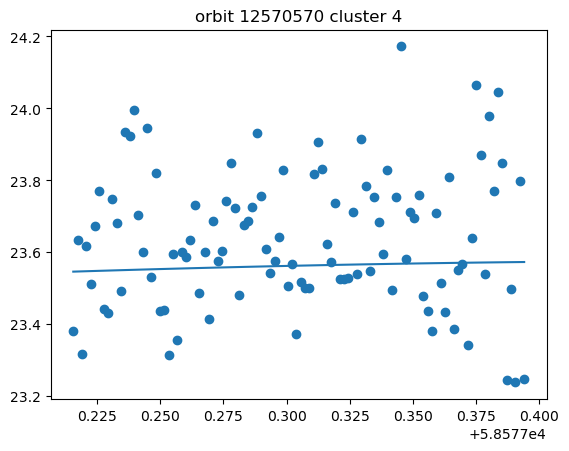

12498415 327 {327: {'fake': 26, 'total': 27}} 23.138636613017763 0.024325496656004475 0.11131572999275635


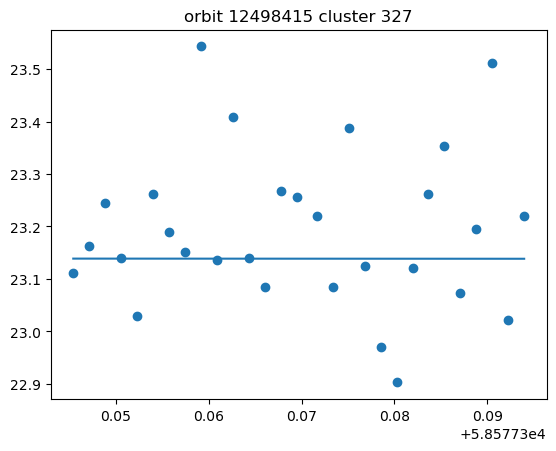

11253755 12 {12: {'fake': 65, 'total': 65}} 23.267122446592243 0.03162164108254828 0.1596026998117195


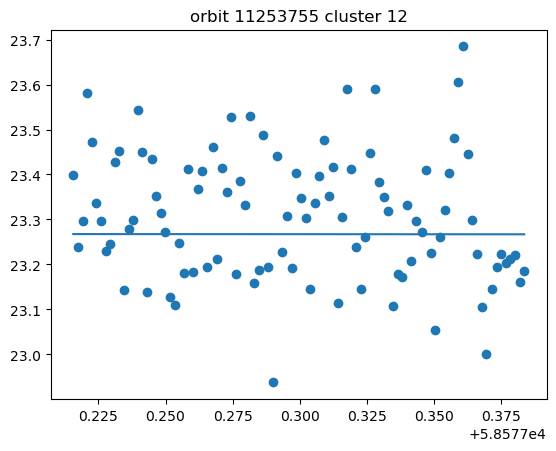

11248233 31 {31: {'fake': 99, 'total': 99}} 22.544283796721075 0.008597467005969861 0.06442183206409022


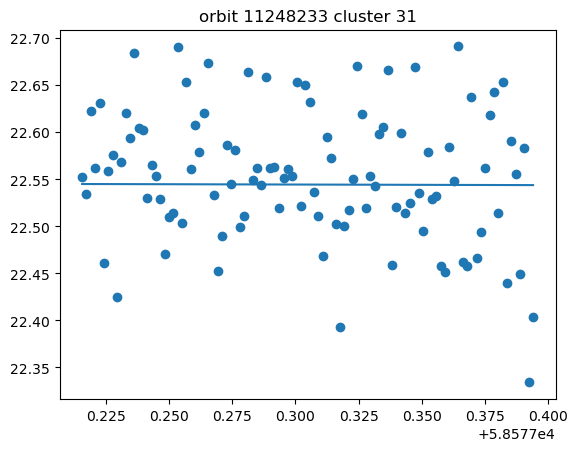

14231693 14 {14: {'fake': 100, 'total': 100}} 20.683432980436148 -0.029120377257672914 0.015780471870646205


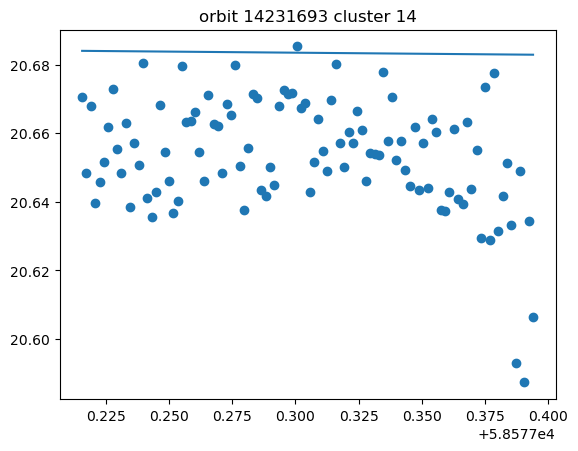

10881618 24 {24: {'fake': 101, 'total': 101}} 23.08560442870909 0.002257287457275936 0.12793729415982832


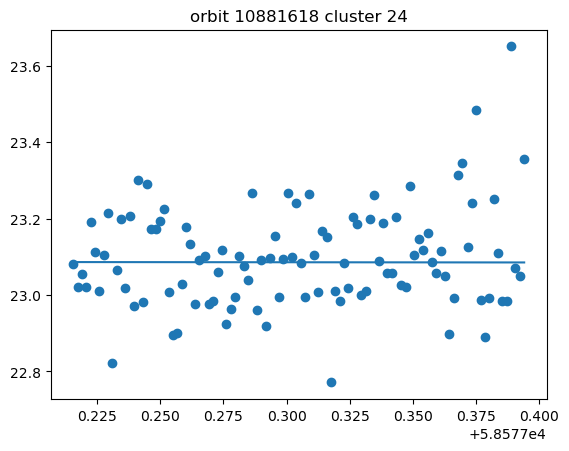

11597629 20 {20: {'fake': 96, 'total': 96}} 23.84227039878883 0.06350419867865398 0.2215951151276634


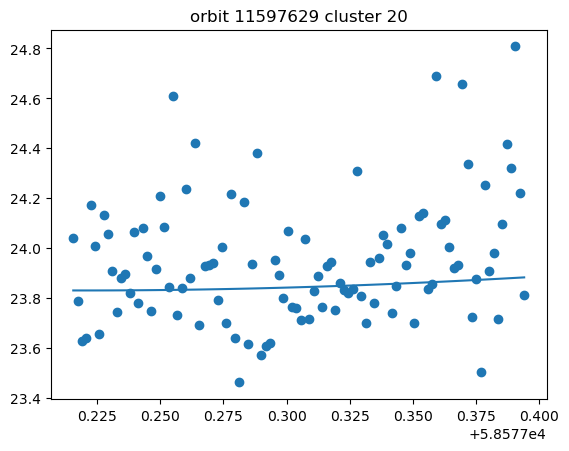

10892353 20 {20: {'fake': 37, 'total': 37}} 18.245456798027135 -0.03557349563488543 0.014625473099267077


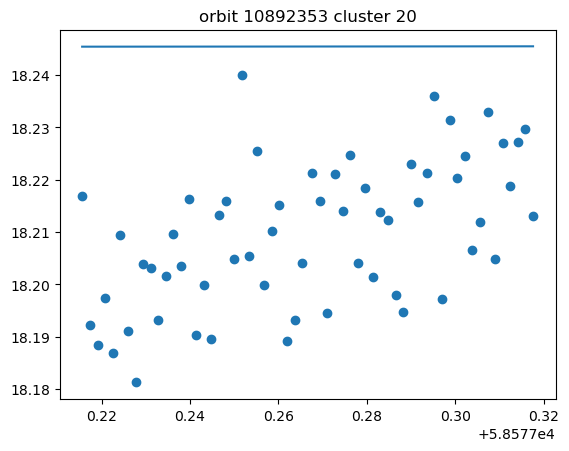

10901781 6 {6: {'fake': 66, 'total': 67}} 23.501515681301292 -0.013527365638472233 0.18833598486944012


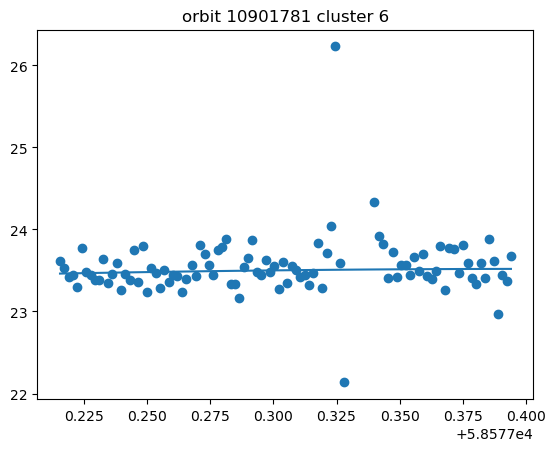

10690617 267 {267: {'fake': 18, 'total': 18}} 21.792758051518103 -0.03164803364862934 0.0451984761667794


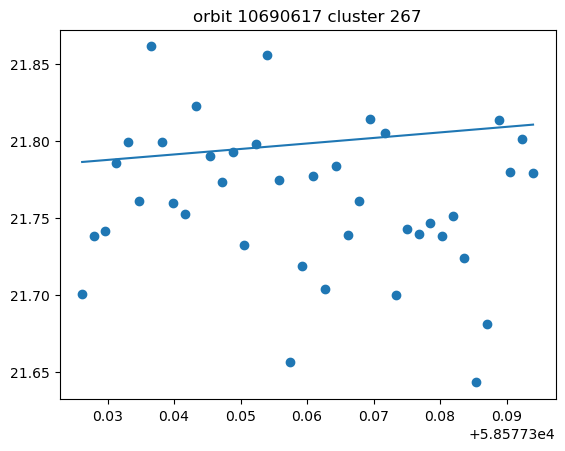

14534787 9 {9: {'fake': 41, 'total': 41}} 24.654106743618243 0.11619165042662516 0.5416317073432466


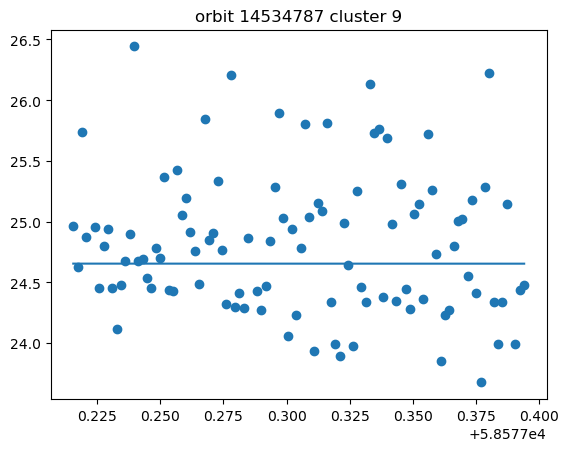

10439021 4 {4: {'fake': 82, 'total': 82}} 23.860418914718686 0.03348244390991084 0.22077392202514787


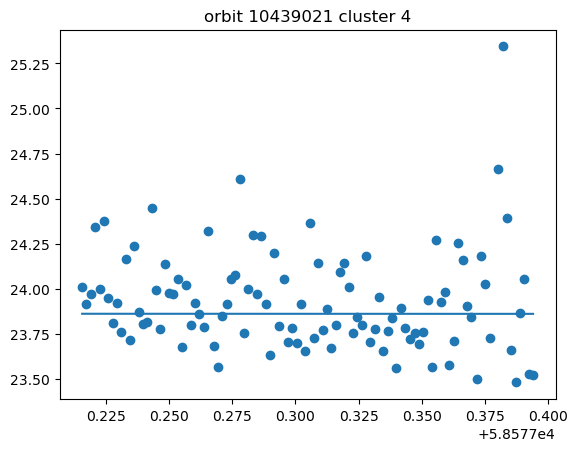

12854932 2 {2: {'fake': 74, 'total': 74}} 24.11326116763971 0.0999138184878543 0.2930977249732429


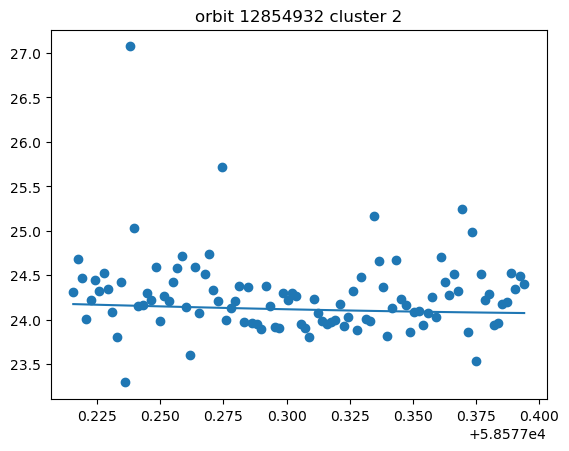

11112874 195 {195: {'fake': 28, 'total': 29}} 24.650453832088168 0.18065937681045519 0.6018882582985116


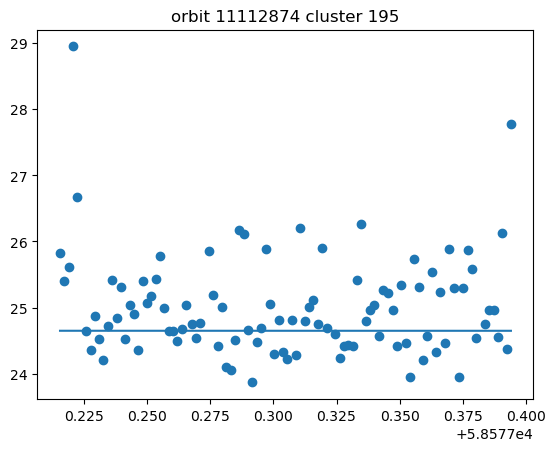

11822286 6 {6: {'fake': 49, 'total': 49}} 23.248533579317126 -0.04450485472443688 0.19085499510866946


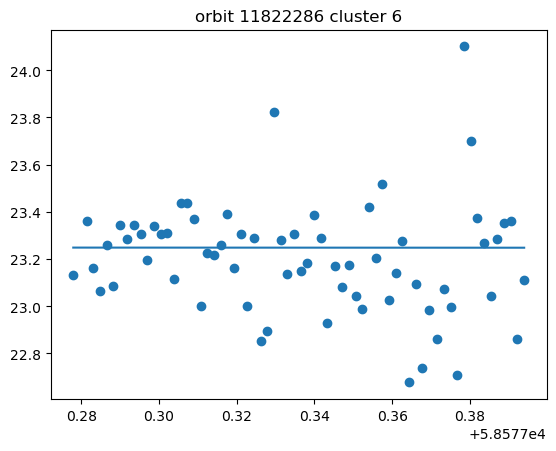

13960340 17 {17: {'fake': 57, 'total': 57}} 23.638482637703785 -0.013828150873232303 0.21198867042953606


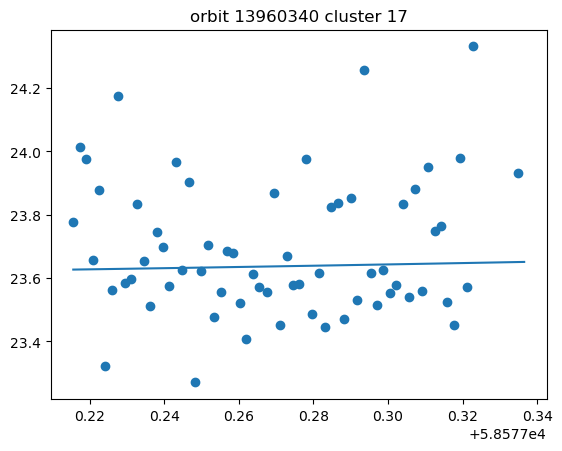

14826073 8 {8: {'fake': 64, 'total': 68}} 23.70314692994526 0.051424134416818035 0.19837233017354208


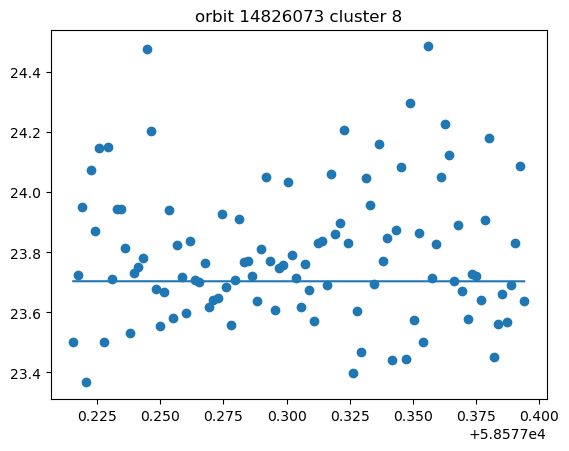

13507963 2 {2: {'fake': 104, 'total': 104}} 21.51958281155811 -0.012034698684830758 0.025005012740650825


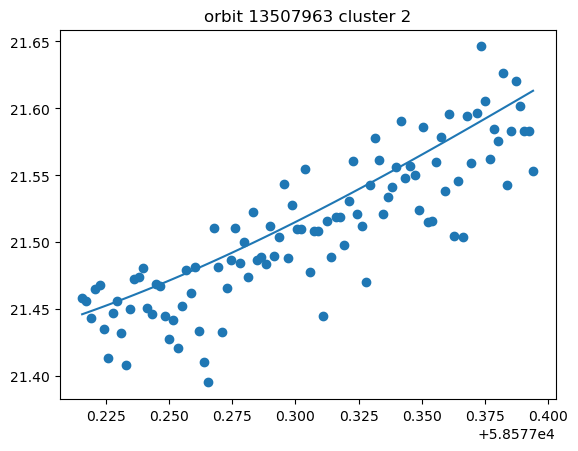

11565792 481 {481: {'fake': 28, 'total': 28}} 20.903985094086526 -0.0309134148516641 0.025041269404562812


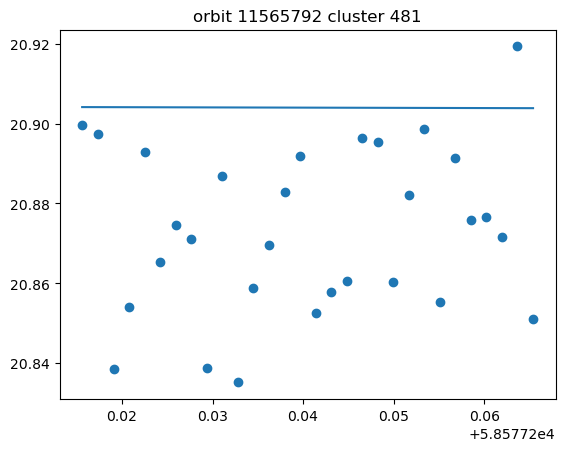

14379202 11 {11: {'fake': 84, 'total': 84}} 20.710250080358414 -0.02625720948489807 0.014217352369286267


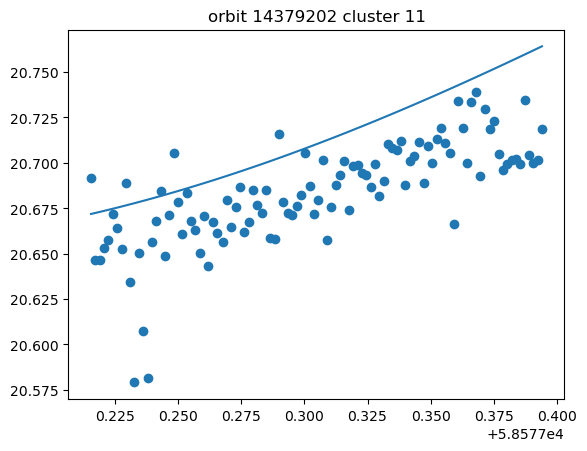

14072772 13 {13: {'fake': 76, 'total': 76}, 24: {'fake': 2, 'total': 54}} 23.990542807116352 -0.07796520161582698 0.27128054053699985


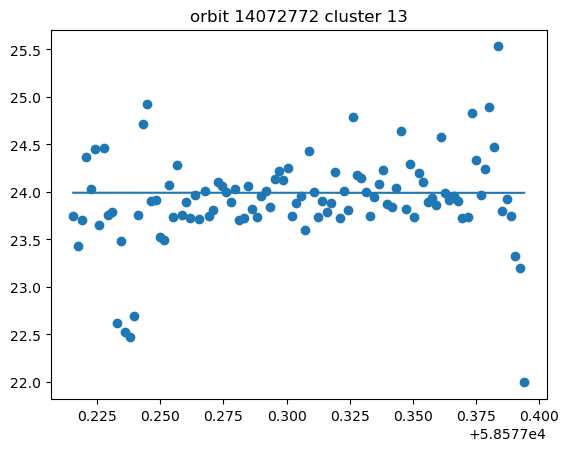

10725618 24 {13: {'fake': 2, 'total': 76}, 24: {'fake': 54, 'total': 54}} 24.328042467722554 0.023112501286192355 0.35555819438994524


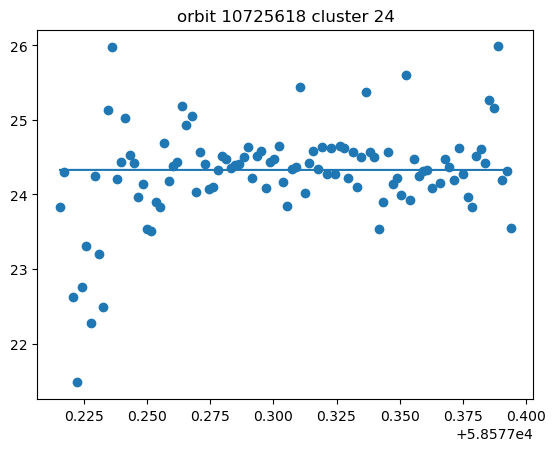

13983168 50 {50: {'fake': 80, 'total': 80}} 23.478037726463214 0.015728230235163565 0.16622238832970154


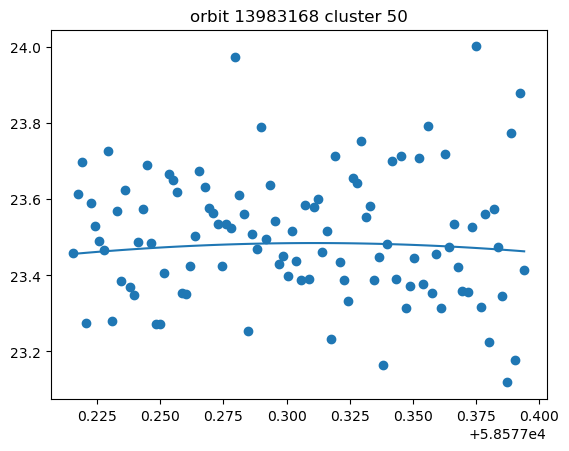

10065221 2 {2: {'fake': 104, 'total': 104}} 23.188854359615995 0.04136844065626022 0.11628328476976502


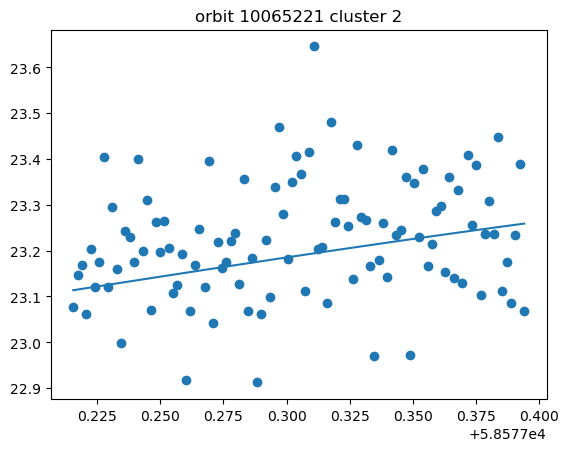

11848660 6 {6: {'fake': 76, 'total': 76}} 23.993726082430726 0.07448327392246235 0.27852110692300974


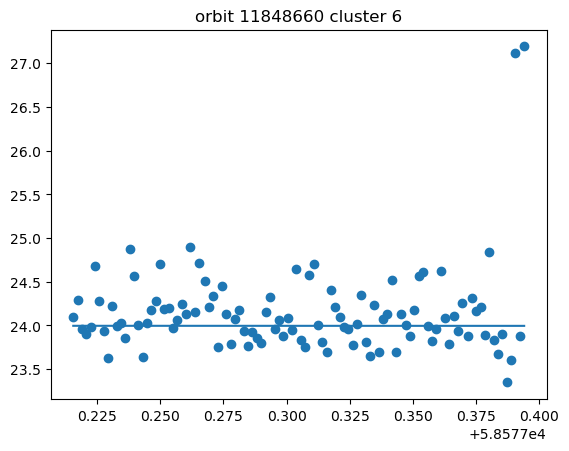

11268933 8 {8: {'fake': 82, 'total': 82}} 24.053072939682504 0.028974095219918894 0.2686216796061407


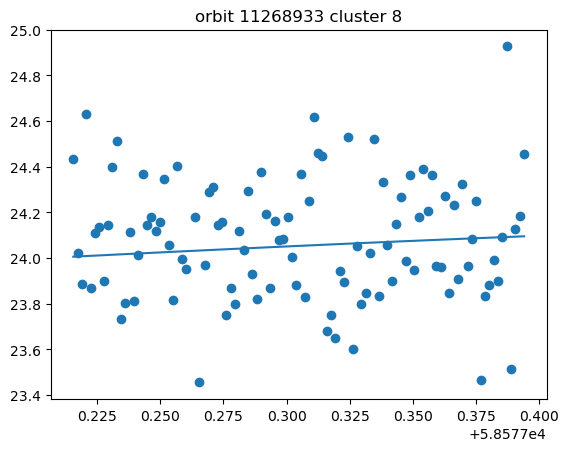

13269989 3 {3: {'fake': 102, 'total': 102}} 23.174362798164033 0.006842324225074137 0.1221498808722373


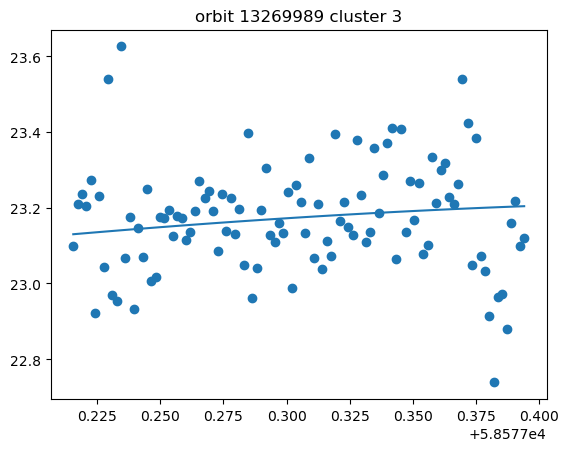

13552168 13 {13: {'fake': 78, 'total': 78}} 21.756084277628872 -0.020897057334194002 0.04011857245863386


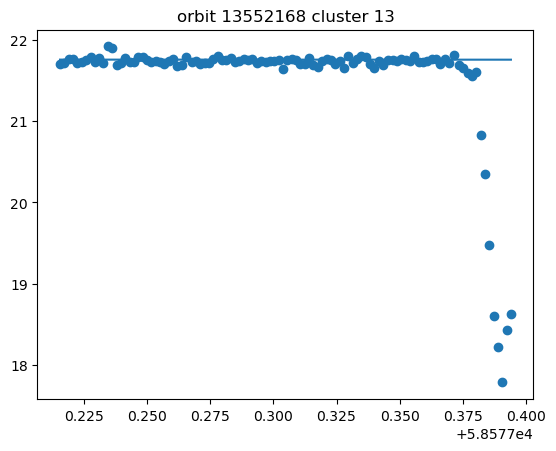

12404532 188 {188: {'fake': 20, 'total': 20}} 24.114709601505282 0.08100226157295154 0.2667495864114132


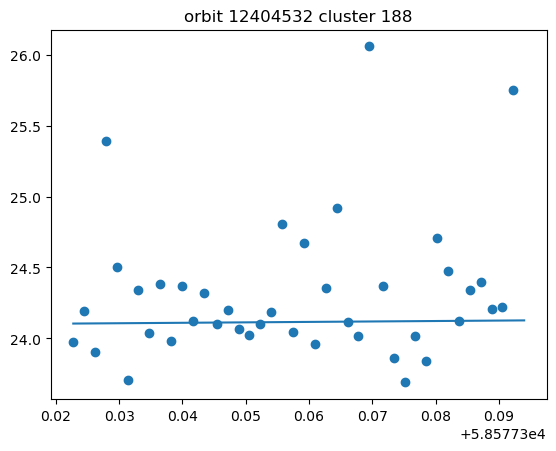

14325498 10 {10: {'fake': 95, 'total': 95}} 22.35717067697972 0.01075459606174256 0.06413489898740994


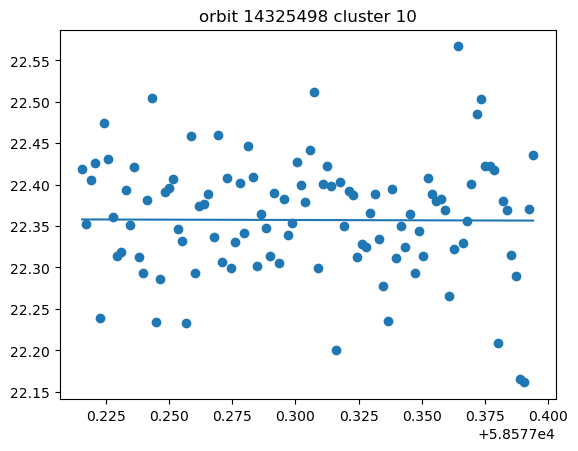

13254976 695 {695: {'fake': 24, 'total': 24}} 24.054181670373147 0.0848826636515021 0.4088816773109823


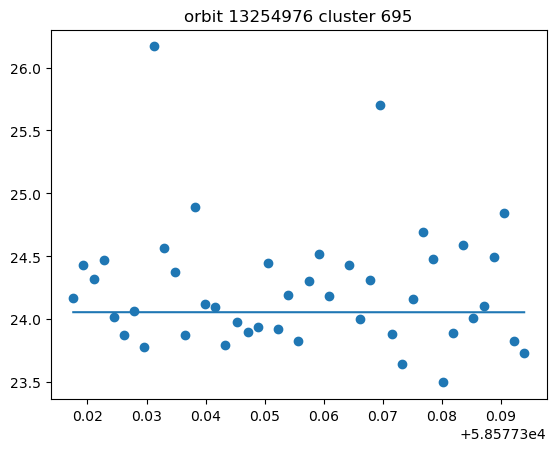

13334340 1 {1: {'fake': 104, 'total': 104}} 23.0840379627747 0.03482861961036221 0.09813775554192107


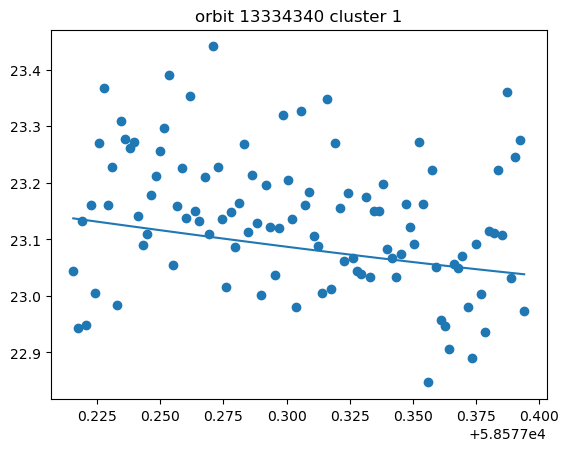

5854665 0 {0: {'fake': 95, 'total': 95}} 23.582836462986492 0.04823093906532705 0.19632535222140463


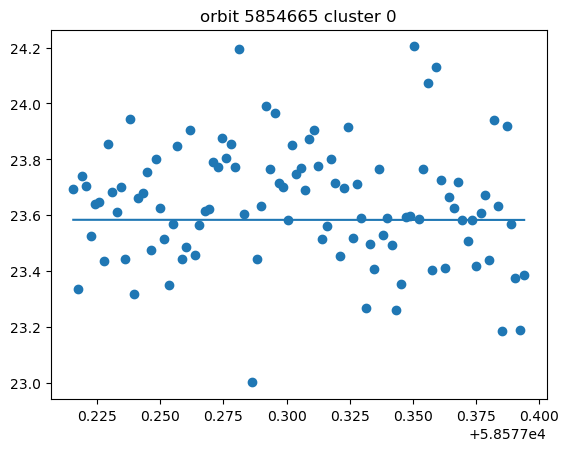

11731283 224 {224: {'fake': 12, 'total': 15}} 25.24778312566029 -0.06617086650962278 0.6757308065561886


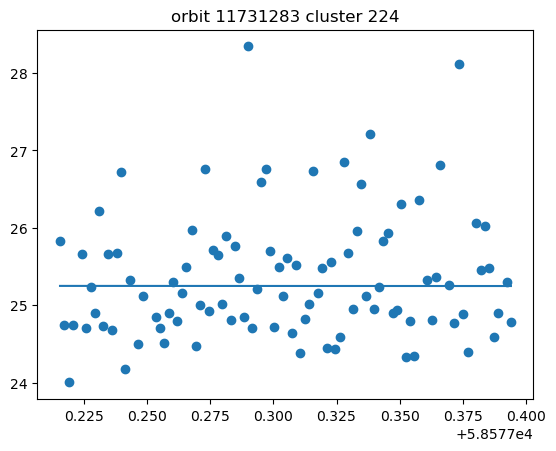

13374166 14 {14: {'fake': 49, 'total': 49}} 24.474797324299296 0.030786681364936896 0.44035980129698826


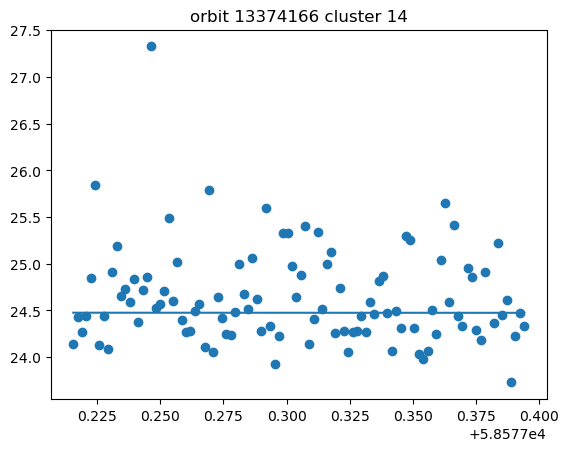

13694269 2 {2: {'fake': 103, 'total': 103}} 23.50412988820779 0.01867463685547399 0.17544912819665762


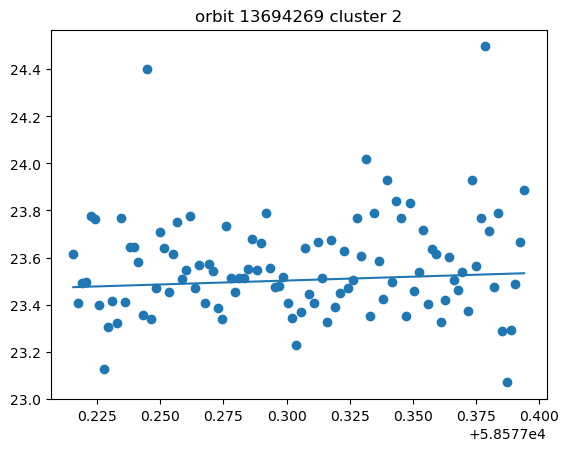

14712897 7 {7: {'fake': 71, 'total': 71}} 22.649568306678432 0.005829973889412088 0.074359597259281


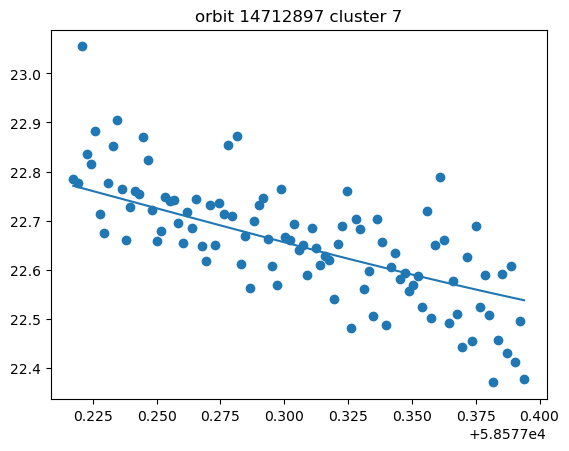

11153156 81 {81: {'fake': 25, 'total': 25}} 22.16687250536438 0.03397164972238542 0.08252585882193911


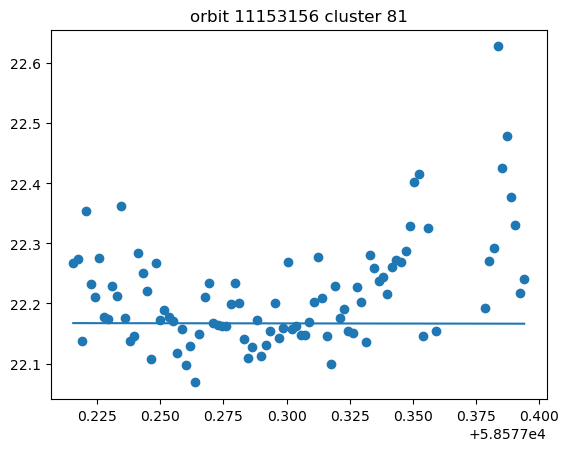

12587652 80 {80: {'fake': 25, 'total': 25}} 24.712376426700217 0.021695994295004795 0.615586208558888


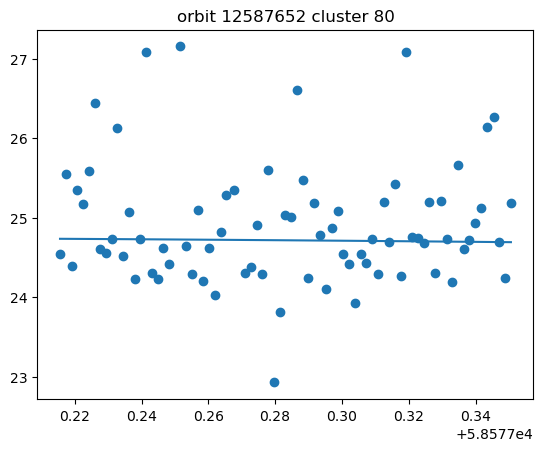

12067567 4 {4: {'fake': 102, 'total': 102}} 23.649966854369985 0.049436037594933424 0.22691380891083257


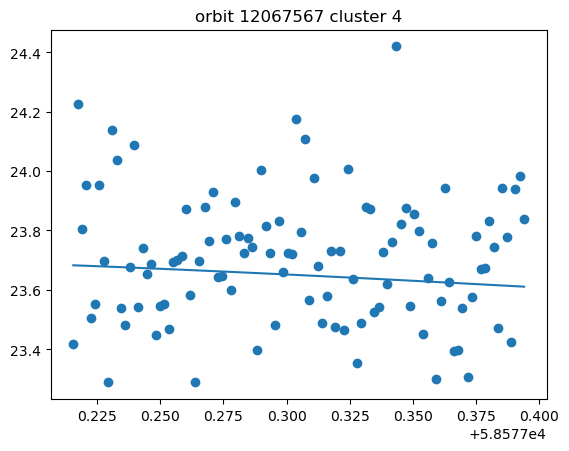

14540056 251 {251: {'fake': 20, 'total': 20}} 23.704366142140657 0.24078467512367396 0.3873612155151611


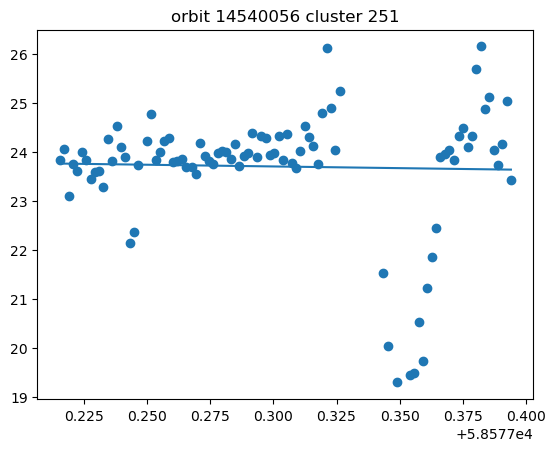

11247102 8 {8: {'fake': 104, 'total': 104}} 20.12550012008212 -0.029134529941678977 0.011529034078322932


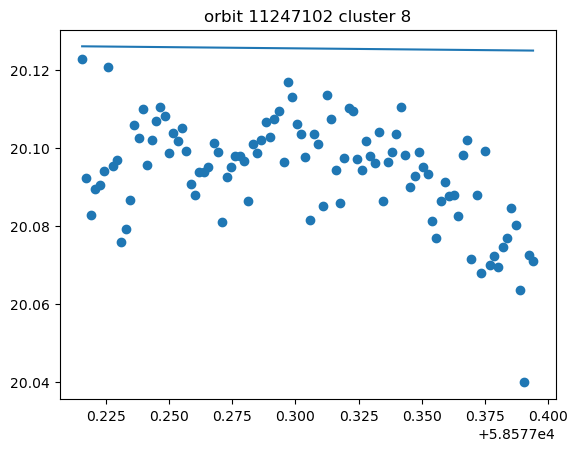

14729655 10 {10: {'fake': 86, 'total': 86}} 24.138418785984335 0.01737128758307449 0.2662401994557036


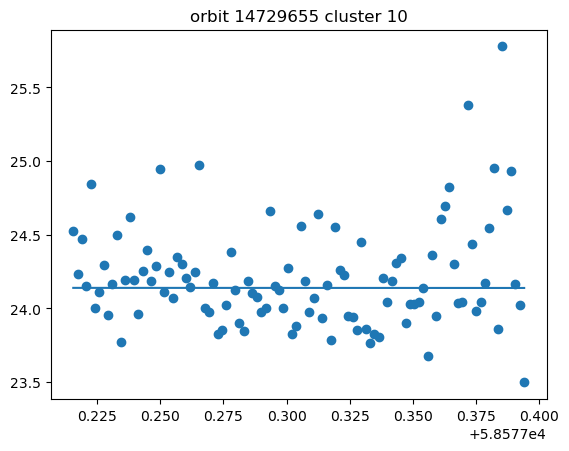

12407615 3 {3: {'fake': 101, 'total': 101}} 23.766809057983323 0.05922888744234456 0.17959217843994466


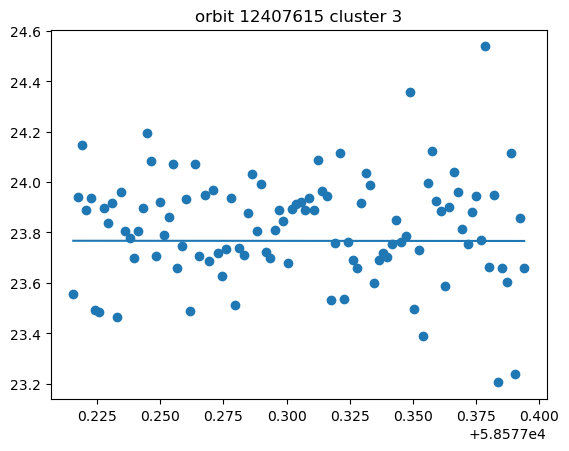

10557958 21 {21: {'fake': 57, 'total': 57}} 23.42984684031466 -0.056894729848934844 0.16946139372171687


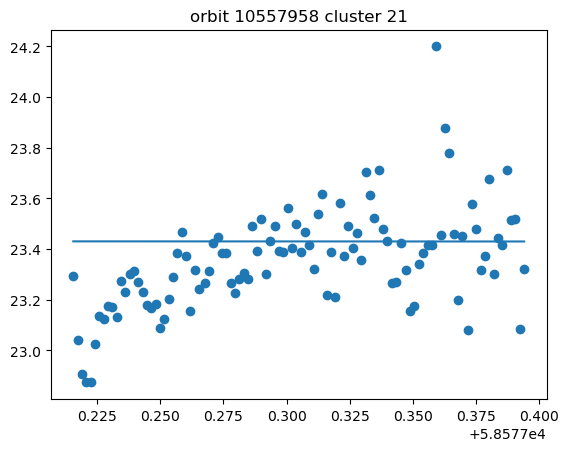

12759290 86 {86: {'fake': 19, 'total': 20}} 24.741148955110773 0.17489450836308507 0.5625751894043838


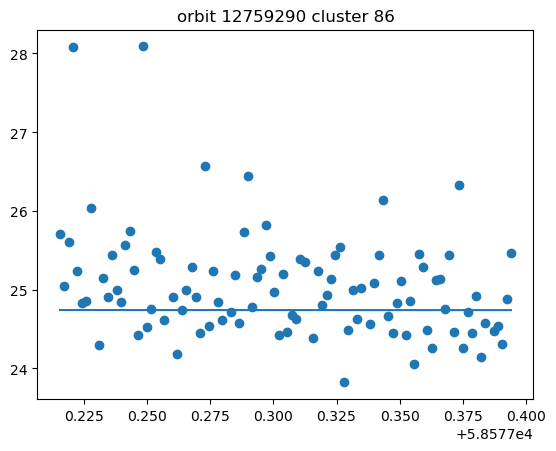

11526494 20 {20: {'fake': 61, 'total': 61}} 22.02104909878173 -0.01012285207030672 0.0443091307790479


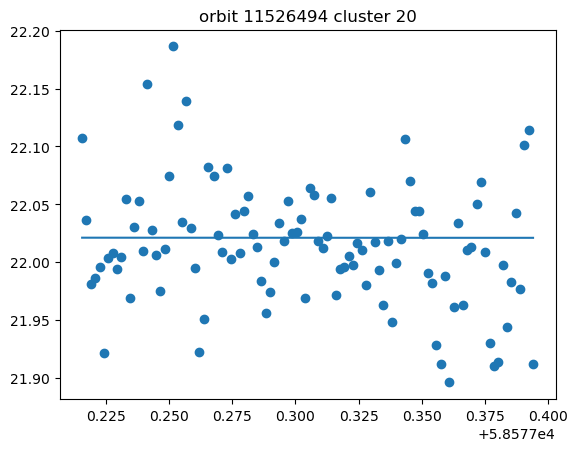

14423962 31 {31: {'fake': 101, 'total': 101}} 19.45218624646371 -0.0323291818943936 0.008412733700934072


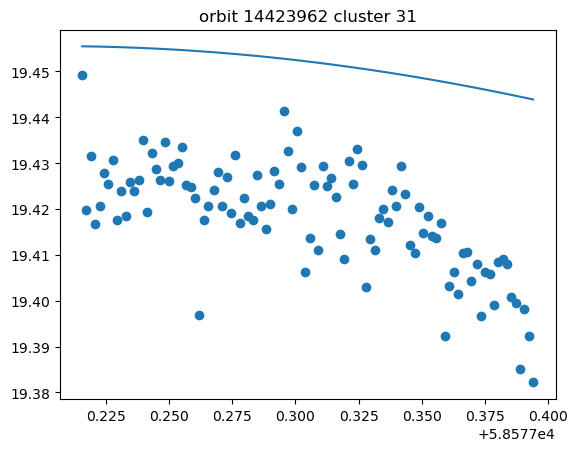

14500162 11 {11: {'fake': 103, 'total': 103}} 19.990863023811674 -0.024480480652401937 0.011077070787455791


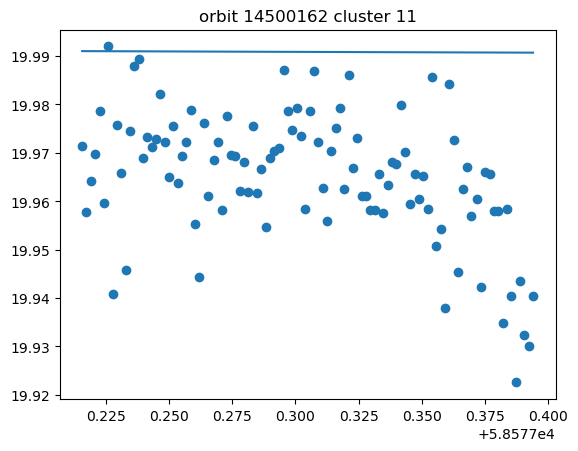

12848836 10 {10: {'fake': 95, 'total': 95}} 23.8439073196043 0.02746082402201644 0.22518633537171467


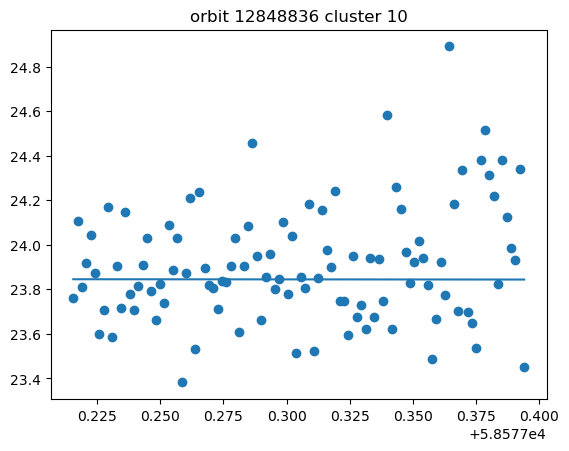

13175371 14 {14: {'fake': 83, 'total': 83}} 22.621128022419665 -0.014139264568957088 0.07943363785407216


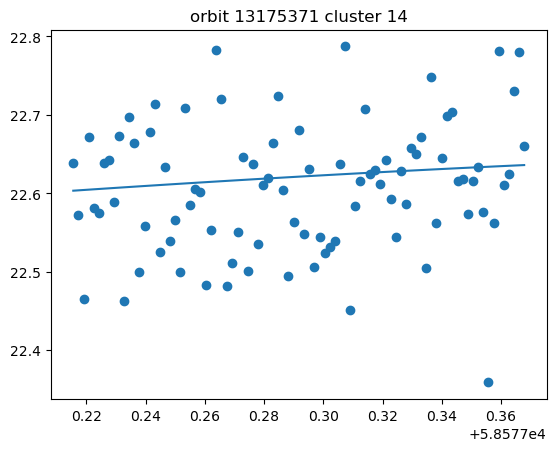

13146767 48 {48: {'fake': 103, 'total': 103}} 22.84155247097403 -0.016863944107942785 0.0875526389626442


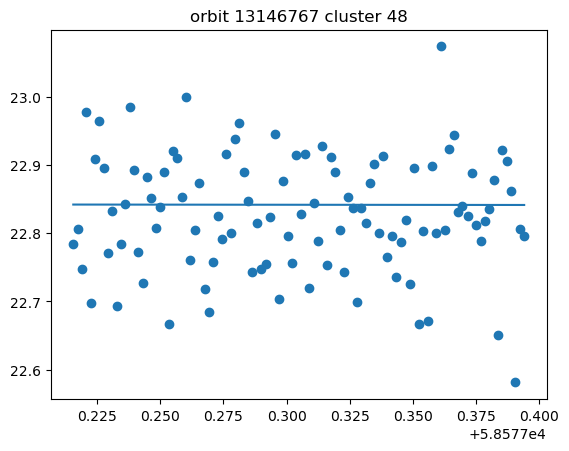

13808327 3 {3: {'fake': 95, 'total': 95}} 23.440832758389988 0.044531119252413376 0.15683835765839058


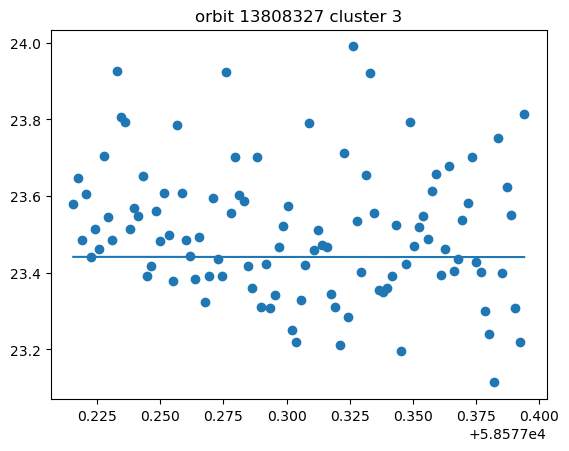

14604099 10 {10: {'fake': 86, 'total': 86}} 23.367332937817118 0.029756607169414195 0.14233891709091984


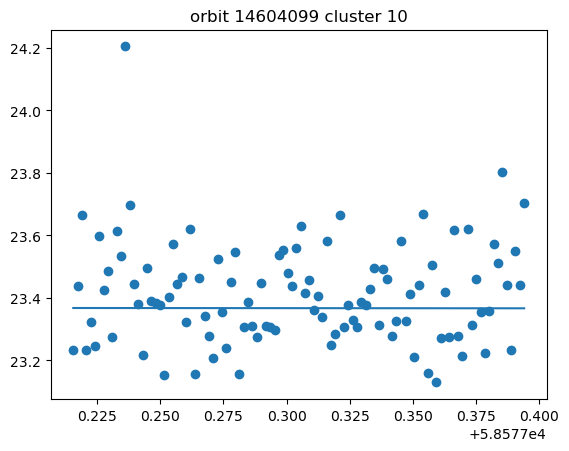

12171101 12 {12: {'fake': 65, 'total': 65}} 21.405832060198343 -0.007262598584960145 0.025275230506055797


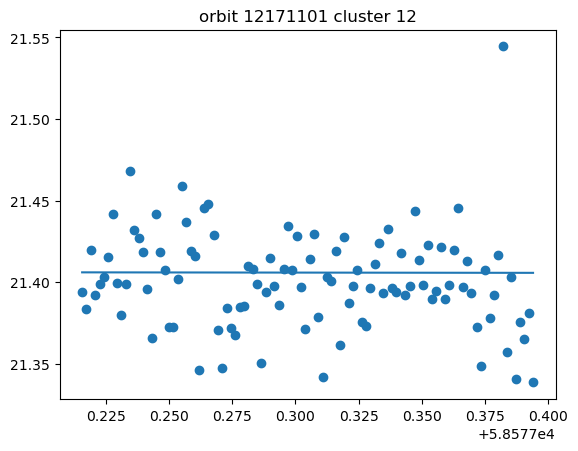

10564173 7 {7: {'fake': 98, 'total': 98}} 23.328483156912792 0.005992946771117502 0.15177919976507104


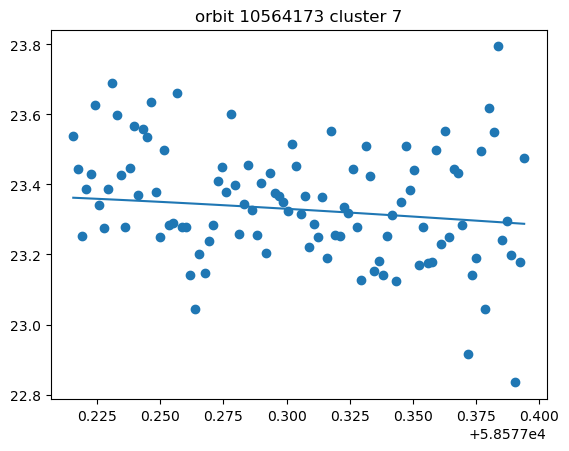

11023234 14 {14: {'fake': 103, 'total': 103}} 22.94037476369786 0.02090861795008614 0.09551754253798224


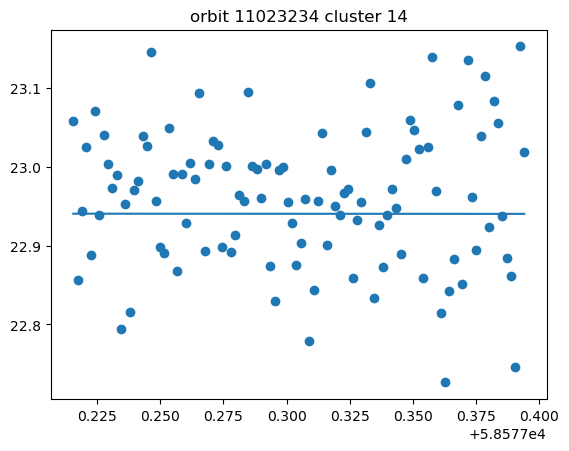

13209539 4 {4: {'fake': 95, 'total': 95}} 23.389078299533075 0.0663030259602202 0.14223382155676612


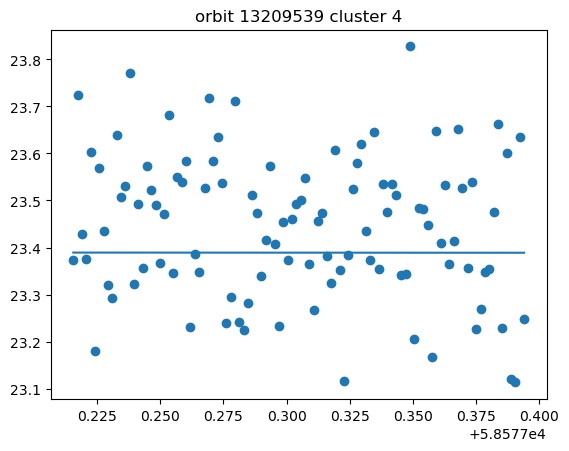

13515874 37 {37: {'fake': 45, 'total': 46}} 24.404555931105154 0.08507310457835437 0.3963055828841274


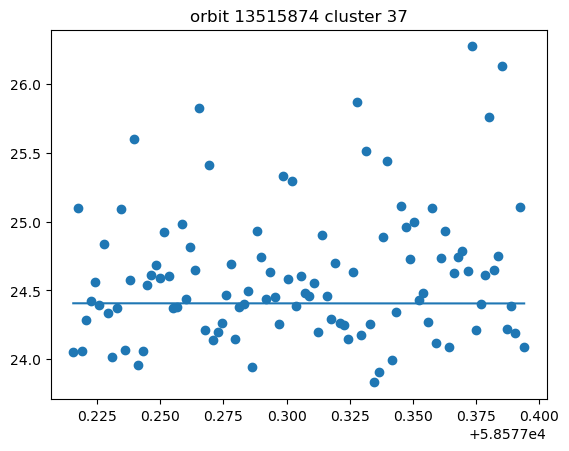

10113319 0 {0: {'fake': 100, 'total': 100}} 23.584115512450673 0.10793448251252613 0.20586211397656298


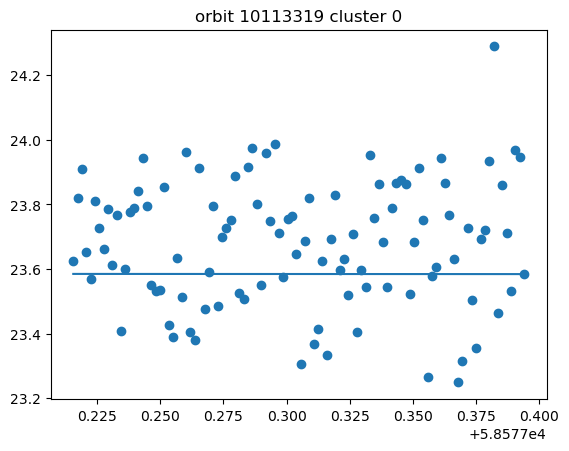

11638953 12 {12: {'fake': 61, 'total': 61}} 23.700391972867507 0.002154028707565203 0.22346827815122217


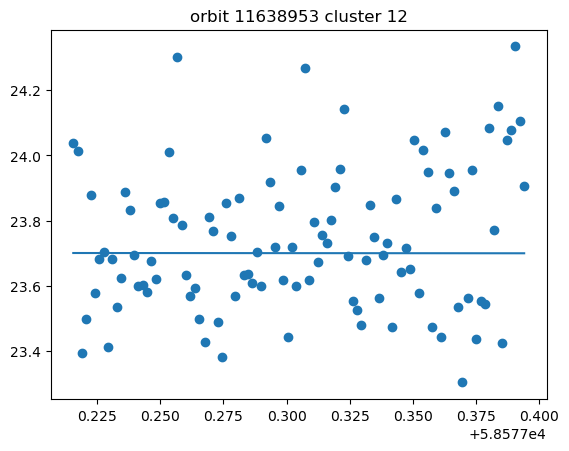

12427866 150 {150: {'fake': 35, 'total': 35}} 21.822653283212595 -0.013262881980208974 0.03627644586730225


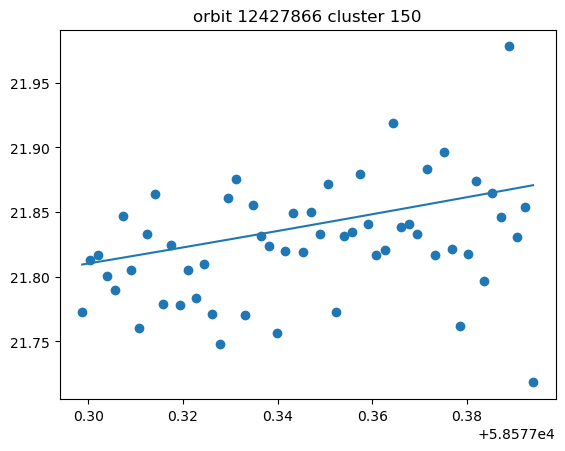

12081089 7 {7: {'fake': 101, 'total': 101}} 23.711242178008106 0.006732945751464214 0.19728254296705872


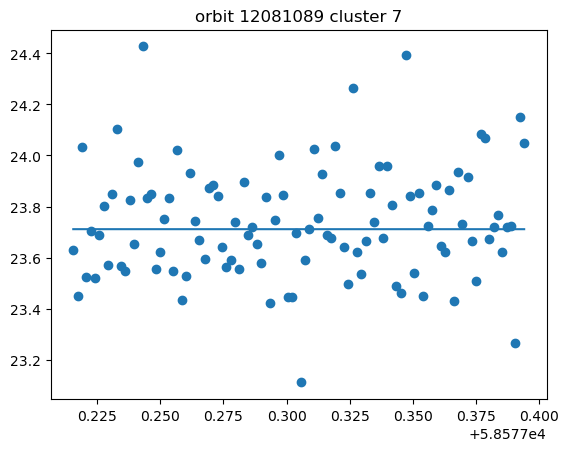

14079491 11 {11: {'fake': 94, 'total': 95}} 23.732405449477508 0.04821190806094933 0.20116818513577794


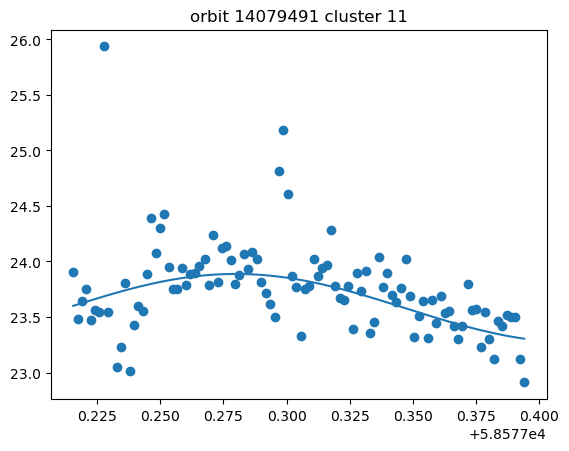

11460000 45 {45: {'fake': 33, 'total': 33}} 22.281798233033744 -0.01753305034851138 0.06992704353210032


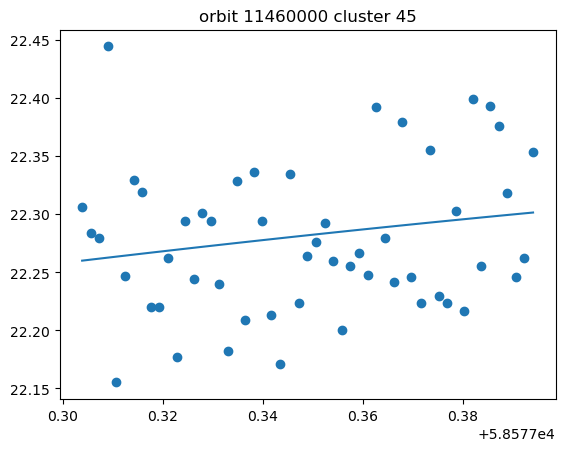

13396285 89 {89: {'fake': 103, 'total': 103}} 21.990623190519837 -0.023757466873711053 0.028946578487608857


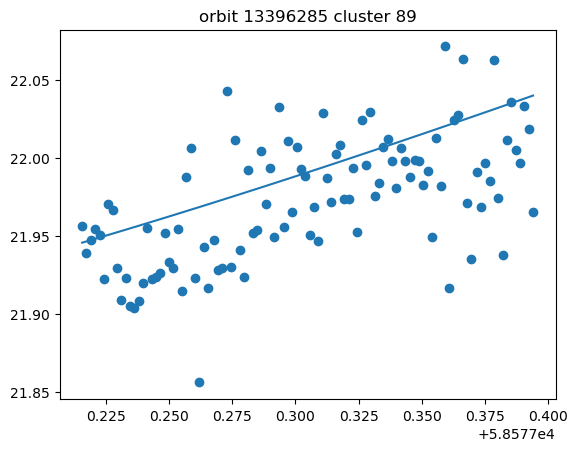

10559055 19 {19: {'fake': 63, 'total': 63}} 22.526057235677676 -0.021894776930281523 0.08156435104254489


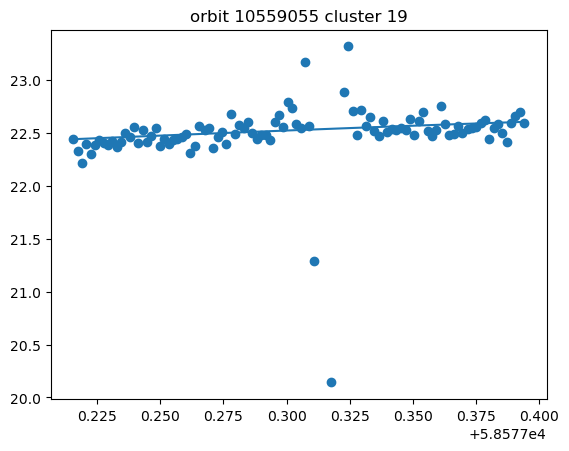

10183346 9 {9: {'fake': 92, 'total': 92}} 23.891353844131483 0.010357960521897525 0.24962553779637553


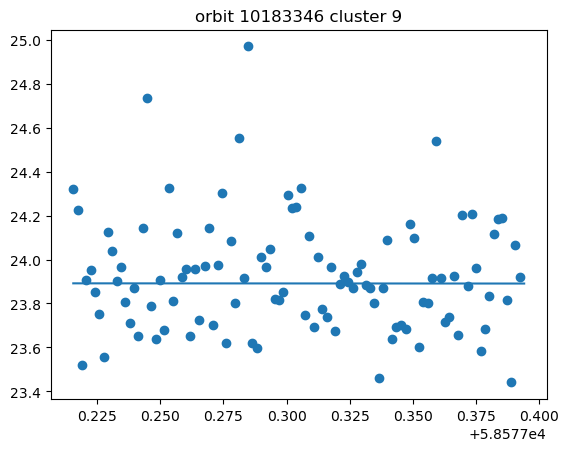

10199666 0 {0: {'fake': 102, 'total': 102}} 23.530102660071755 0.025846087003436935 0.15868146580618137


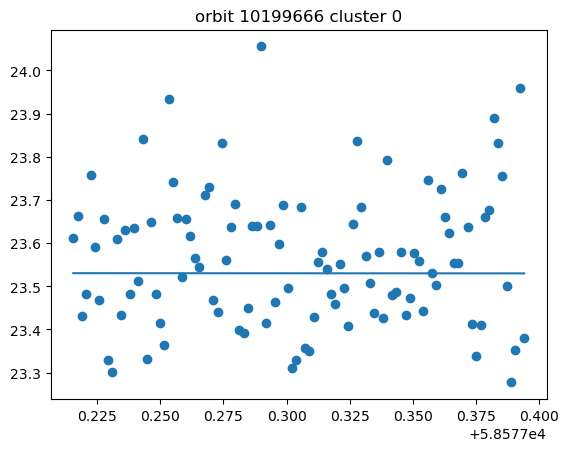

11717528 10 {10: {'fake': 95, 'total': 95}} 20.114497462128664 -0.031760298167380796 0.011538473306154156


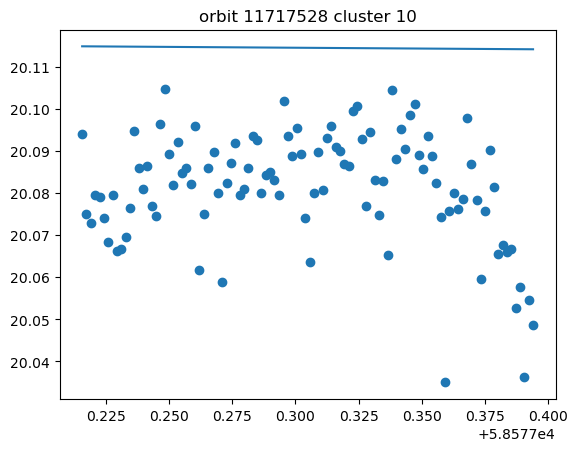

13109576 2 {2: {'fake': 103, 'total': 103}} 20.81786896499376 -0.028760751826453657 0.014269277314974535


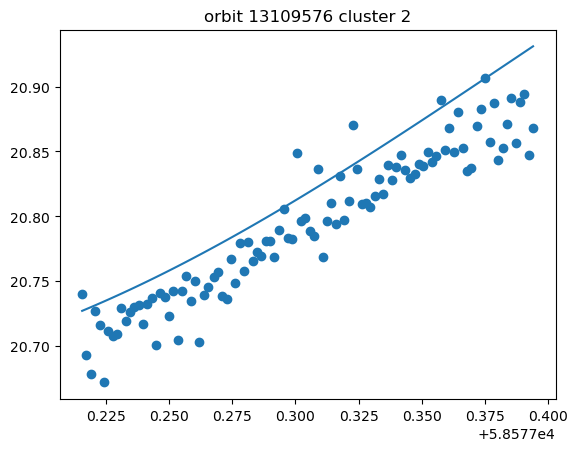

14450898 16 {16: {'fake': 63, 'total': 63}} 21.284205307276537 -0.021450918967827803 0.024718572790811872


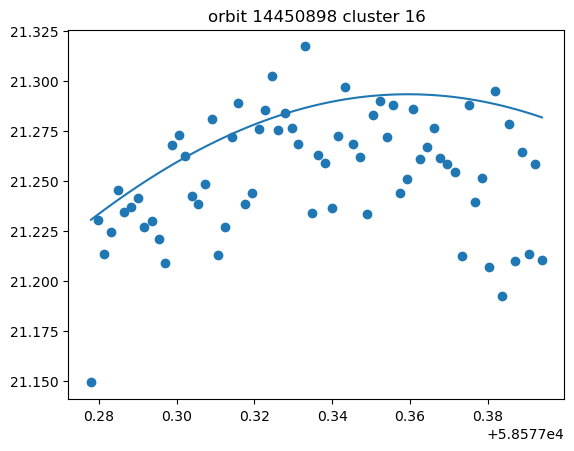

11089049 8 {8: {'fake': 86, 'total': 87}} 24.07944499940553 0.061659574927210414 0.29778708040143836


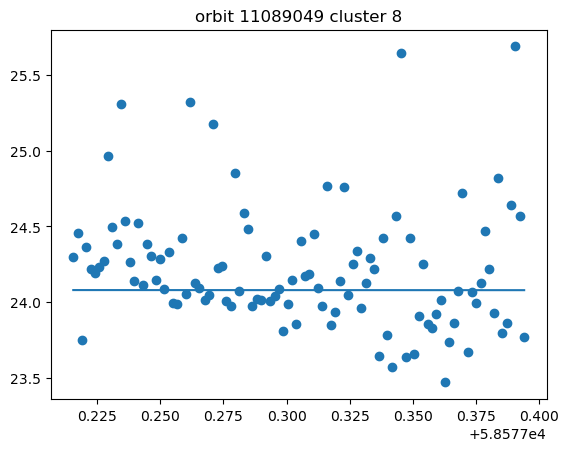

13873216 4 {4: {'fake': 98, 'total': 98}} 23.875141918593243 0.03342546921420286 0.26687041554382623


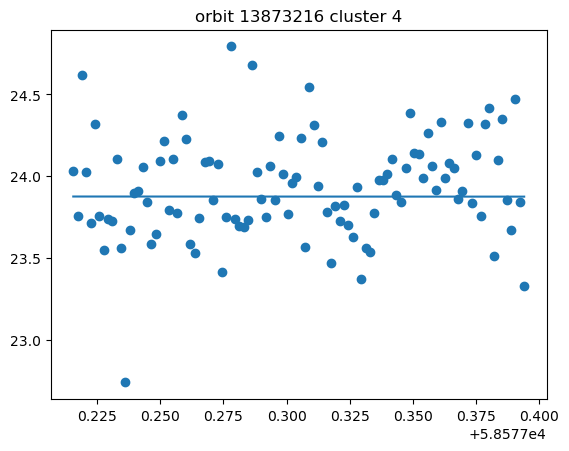

11675206 10 {10: {'fake': 99, 'total': 99}} 23.81964004399696 0.06543403690171523 0.17357473533560797


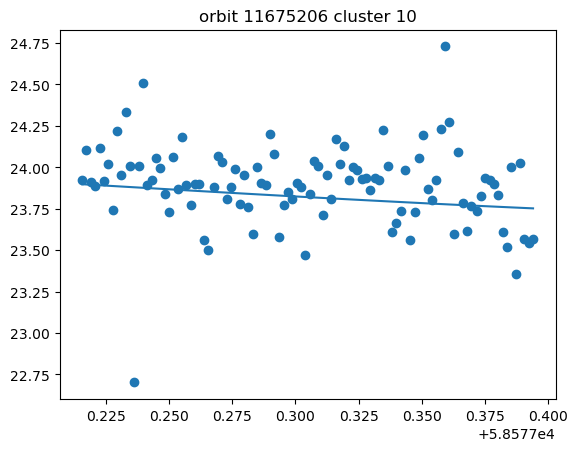

14625007 8 {8: {'fake': 73, 'total': 73}} 23.451768859500163 0.01717612301824545 0.2141922249041868


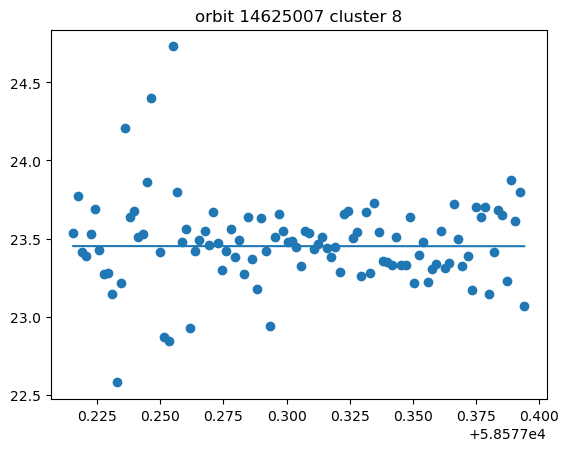

12352758 18 {18: {'fake': 103, 'total': 103}} 23.002839639328656 -0.007591392192292545 0.09194845637701214


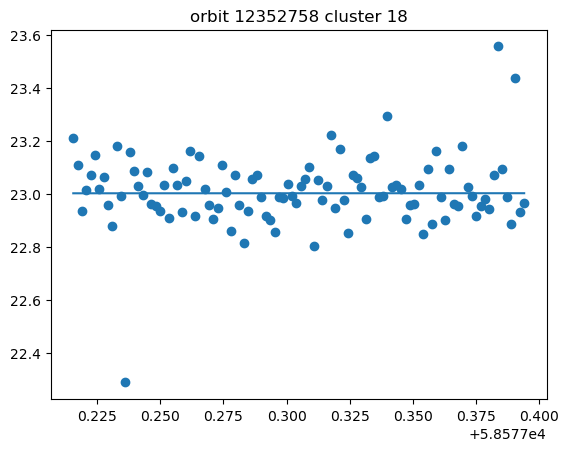

10243780 11 {11: {'fake': 92, 'total': 92}} 22.65055134727462 0.010988455535487773 0.07950013131883384


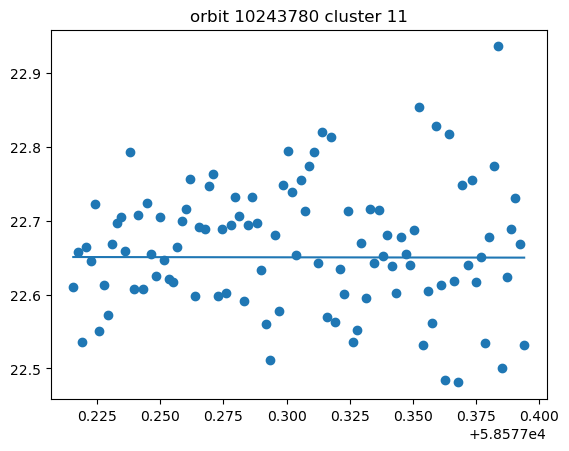

11885929 10 {10: {'fake': 86, 'total': 86}} 24.056454640719515 0.05718054784797566 0.32163961180396394


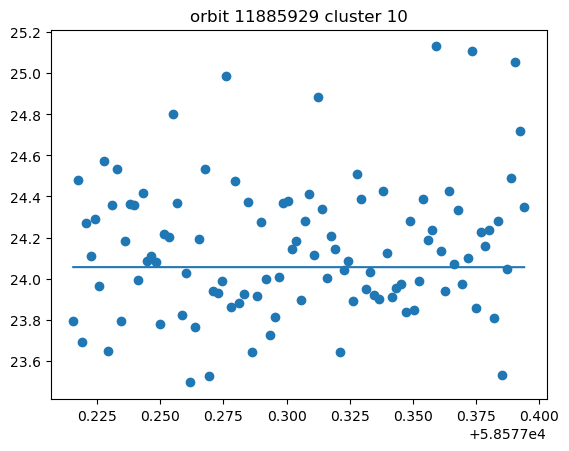

11037453 6 {6: {'fake': 99, 'total': 99}} 21.415600194820822 -0.01846997027731767 0.02437309156326398


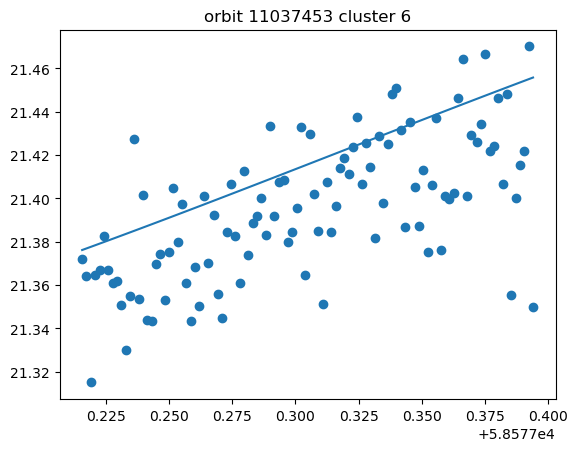

14471862 151 {151: {'fake': 26, 'total': 27}} 24.954553513938684 -0.05022433791924641 0.7067971745910736


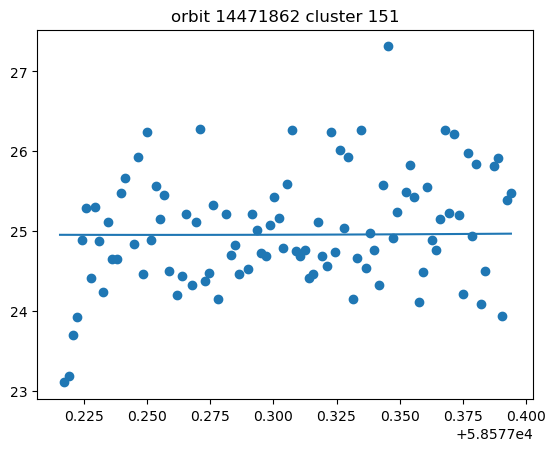

10235392 275 {275: {'fake': 16, 'total': 17}} 24.918081730722317 0.14928142660139443 0.5910861267673014


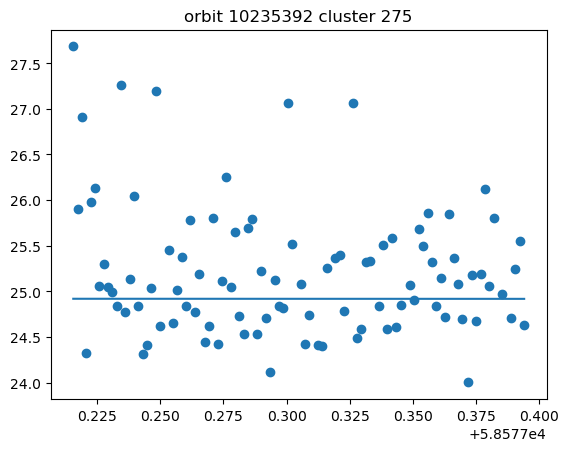

13112772 13 {13: {'fake': 89, 'total': 89}} 21.10946985726826 -0.027113448692130504 0.020419793245135952


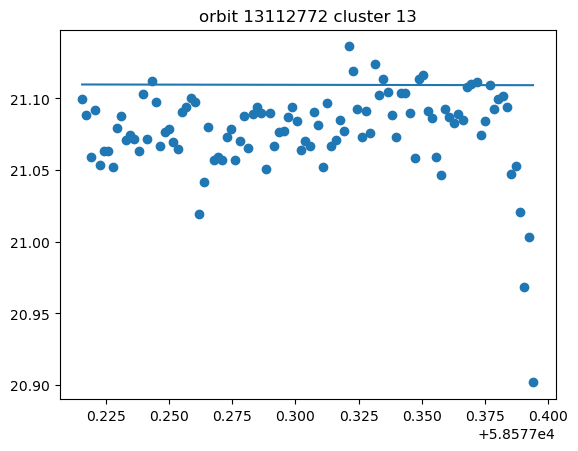

14802134 17 {17: {'fake': 60, 'total': 62}} 24.02328297696758 0.07712654069063518 0.2535610525077326


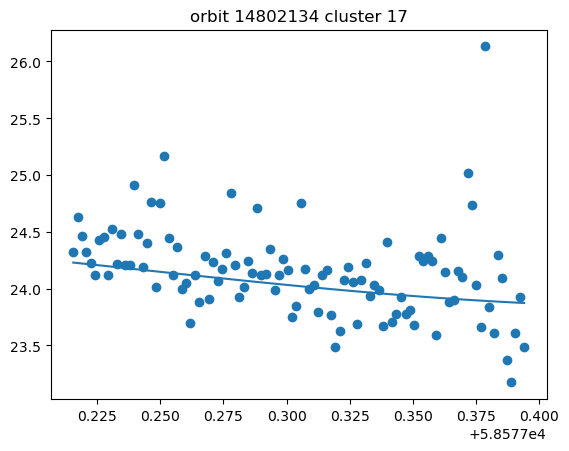

10949597 4 {4: {'fake': 90, 'total': 90}} 22.854501614031015 0.0032089664307033416 0.08850236952173302


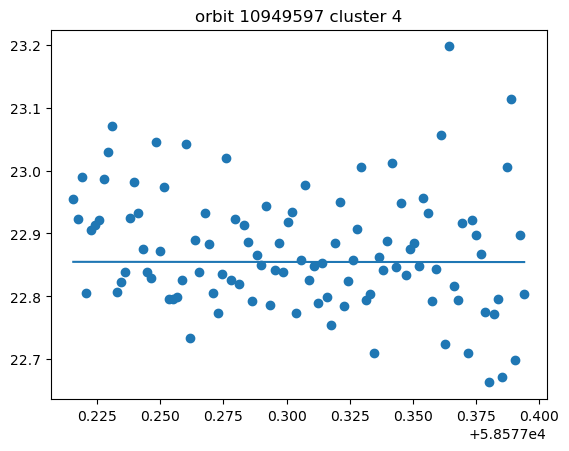

14283923 125 {125: {'fake': 21, 'total': 21}} 24.8993359138548 0.17658214765745583 0.6127856964614085


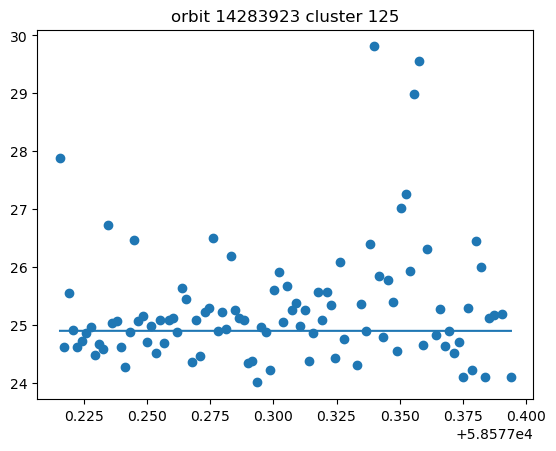

14306213 386 {386: {'fake': 75, 'total': 75}} 23.514718677319273 0.02928714488814954 0.14053501178068556


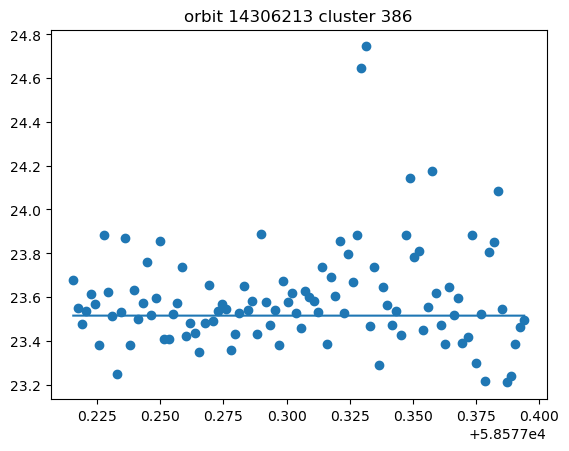

14410489 9 {9: {'fake': 74, 'total': 74}} 24.177034647425465 0.1106905219827965 0.32263990327247016


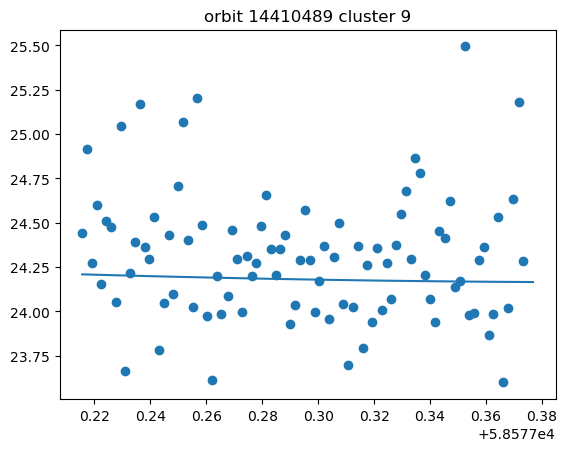

12669978 11 {11: {'fake': 74, 'total': 74}} 23.736452378751032 0.0580417312918069 0.19567229038216782


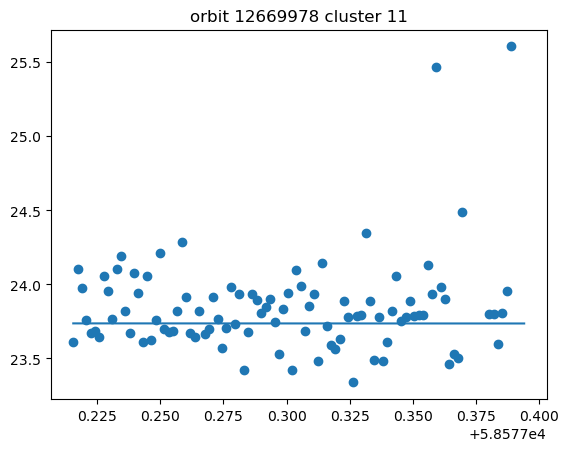

14660574 10 {10: {'fake': 84, 'total': 84}} 24.009428742529973 0.11106029926199135 0.28508481433469135


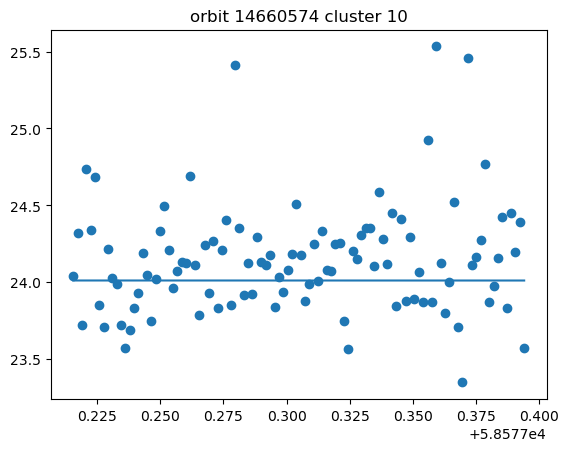

10808236 18 {18: {'fake': 104, 'total': 104}} 22.378698104852496 -0.014174549939848902 0.06486121645857587


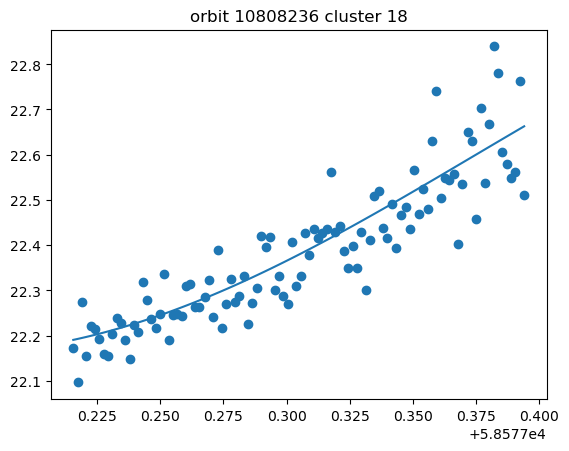

12137413 27 {27: {'fake': 72, 'total': 72}} 24.298243964197773 -0.009243391438268134 0.4337814091742203


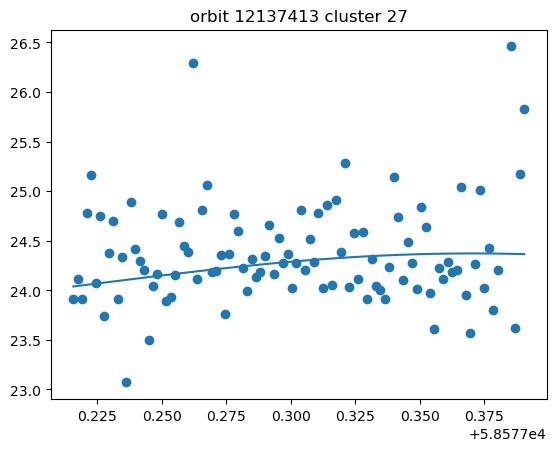

10785094 28 {28: {'fake': 104, 'total': 104}} 22.432425406442107 0.008172228388195535 0.06023389263077055


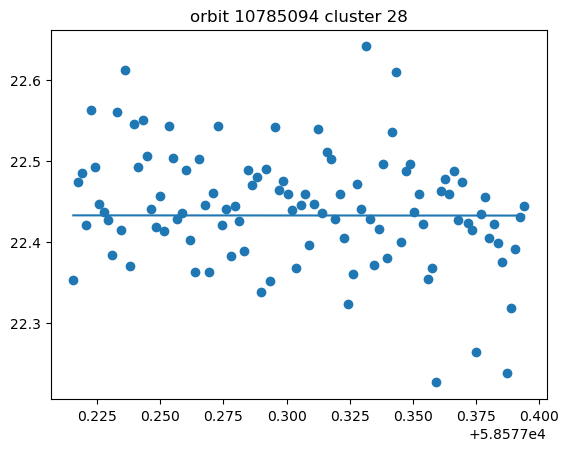

13347553 12 {12: {'fake': 93, 'total': 93}} 23.505819687596805 0.06388861163977211 0.175652413613837


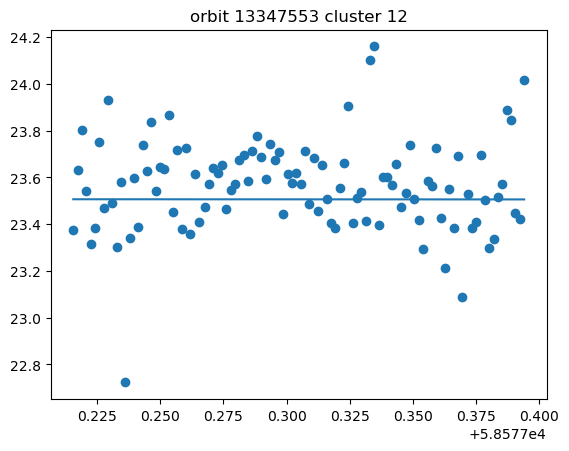

12311782 20 {20: {'fake': 102, 'total': 102}} 20.07259422416001 -0.02614483720766181 0.011460688319818004


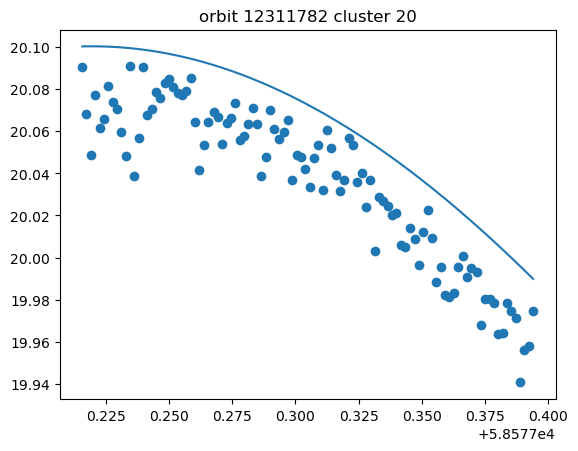

11067068 18 {18: {'fake': 73, 'total': 73}} 23.921664980958305 0.10558909977805087 0.2730375233237564


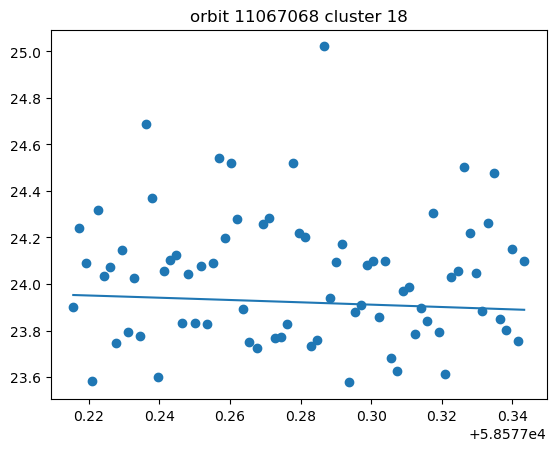

10002376 10 {10: {'fake': 89, 'total': 89}} 24.054322260817777 0.09677972379056499 0.30041836393924337


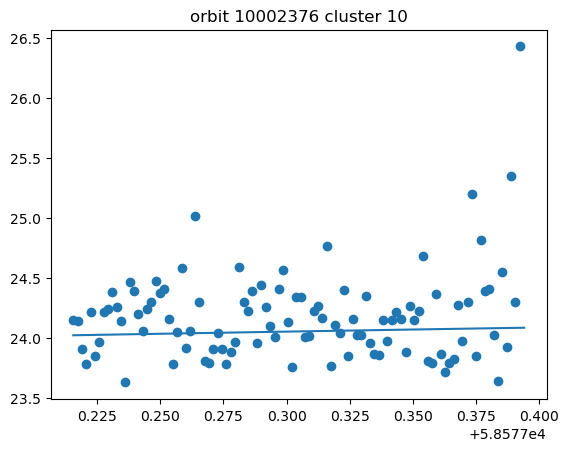

12594041 0 {0: {'fake': 96, 'total': 96}} 23.104606742820742 0.011359325002056053 0.13034378309652125


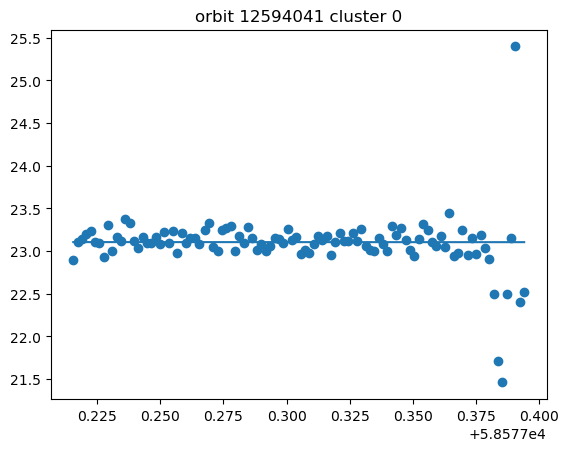

10705236 153 {153: {'fake': 33, 'total': 33}} 24.04697350196234 -0.04129830945668189 0.22049004230863026


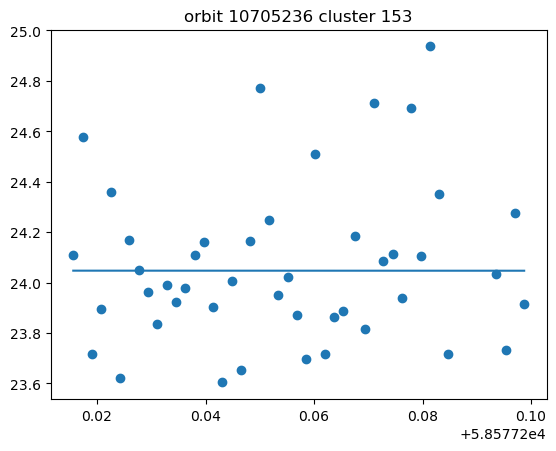

10260314 14 {14: {'fake': 90, 'total': 90}} 23.5679415764507 0.02778770803554309 0.20547494059744698


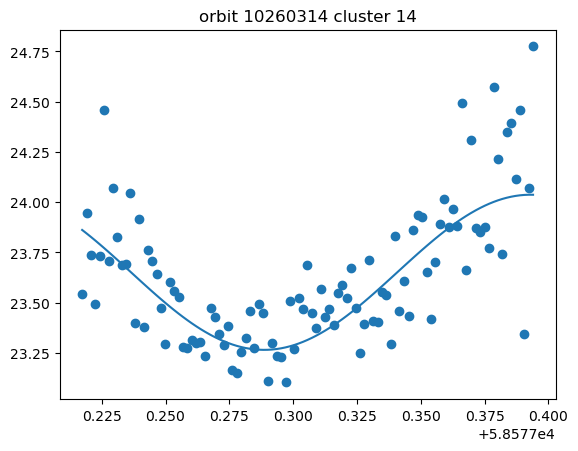

12799102 54 {54: {'fake': 45, 'total': 46}} 24.148123739424864 0.07978474174055705 0.3441504953484319


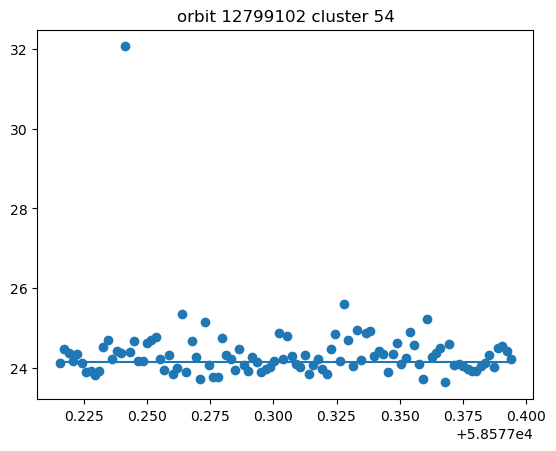

3.0 61
10200778 26 {26: {'fake': 54, 'total': 54}} 22.69064058422527 -0.022507899638682716 0.08367173524906835


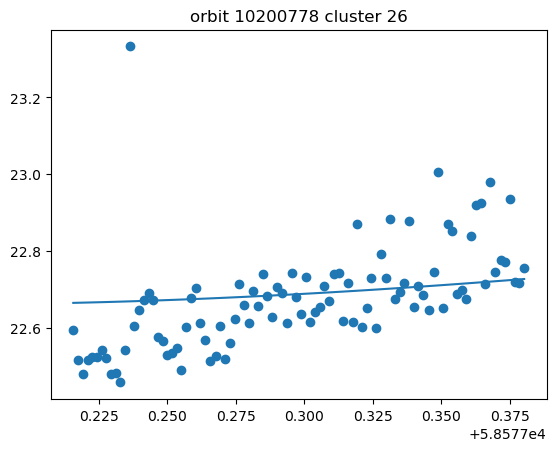

12084118 11 {11: {'fake': 98, 'total': 98}} 23.760347233801063 0.07294139531155075 0.22983650374160527


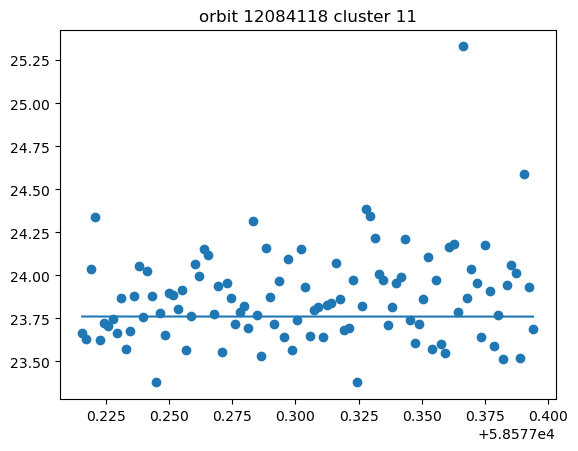

In [142]:
# I want for each fake the 

detector = 1
snr = 3.0

m = []
for detector in range(1, 63):
    try:
        f = load_fakes("new", detector)
        r = recoveries("new", detector, snr, "regular", "asteroid")
        clusters = load_summary("new", detector, snr, "regular", "asteroid")
    except:
        print(snr, detector)
        continue
    for k in r:
        if len(r[k]['points']) > 0:
            o = f[f['ORBITID'] == k]

            c_idx = []
            c_n = []
            for c in r[k]['points']:
                if r[k]['points'][c]['fake'] / r[k]['points'][c]['total'] > 0.5: # pick clusters with >0.5 purity
                    c_n.append(r[k]['points'][c]['fake'])
                    c_idx.append(c)
            
            if len(c_idx) > 0:
                c = c_idx[c_n.index(max(c_n))] # pick the cluster with the largest number of points
                
                cluster = clusters[c]
                t = make_object_table(cluster)
                d = astropy.table.join(
                    o[['EXPNUM', 'MAG']], 
                    t, 
                    keys_left=['EXPNUM'], 
                    keys_right=['expnum']
                )
                
                dm = d['mag'] - d['MAG']

                y = np.nanmedian(dm)
                q = np.quantile(dm[~np.isnan(dm)], [0.25, 0.75])
                sigma_g = 0.7413 * (q[1] - q[0])    
                print(k, c, r[k]['points'], np.median(o['MAG']), y, sigma_g)
                plt.scatter(d['time'], d['mag'])
                plt.plot(d['time'], d['MAG'])
                plt.title(f"orbit {k} cluster {c}")
                plt.show()
                m.append(
                    {
                        "x": np.median(d['MAG']),
                        "yerr": sigma_g,
                        "y": y,
                    }
                )
            
m = astropy.table.Table(m)
#             plt.scatter(d['time'], d['MAG'] - d['mag'], c=d['mask'])
#             plt.hist(d['MAG'] - d['mag'], bins='auto')
#             plt.show()

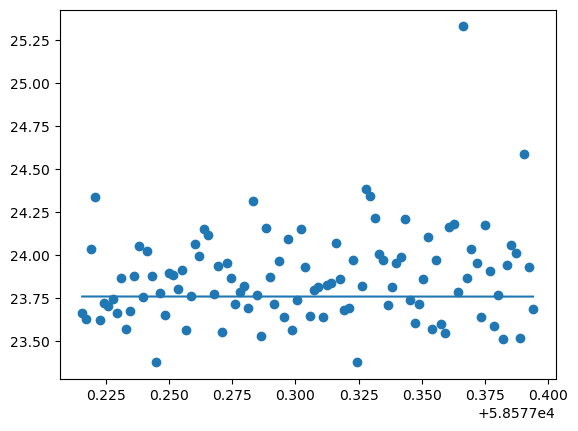

In [140]:
plt.scatter(d['time'], d['mag'])
plt.plot(d['time'], d['MAG'])
plt.show()

In [ ]:
plt.scatter(d['time'], d['mag'])
plt.plot(d['time'], d['MAG'])
plt.show()

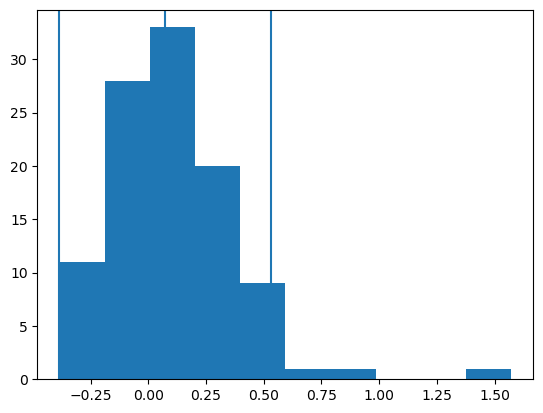

In [92]:
dm = d['mag'] - d['MAG']

m = np.median(dm)
q = np.quantile(dm, [0.25, 0.75])
sigma_g = 0.7413 * (q[1] - q[0])
u = m + 2*sigma_g
l = m - 2*sigma_g
clipped = (dm > u) | (dm < l)
plt.hist(dm)
plt.axvline(u)
plt.axvline(l)
plt.axvline(m)
plt.show()

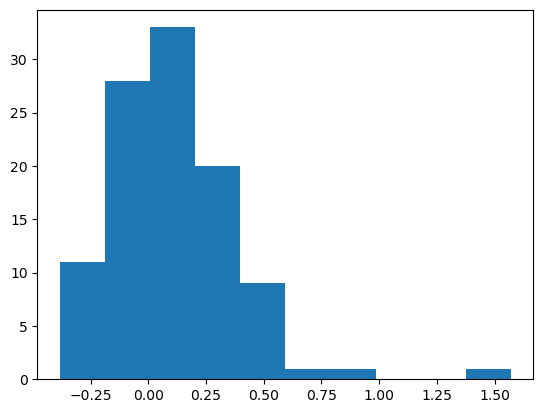

In [86]:
plt.hist(d['mag'] - d['MAG'])
plt.show()

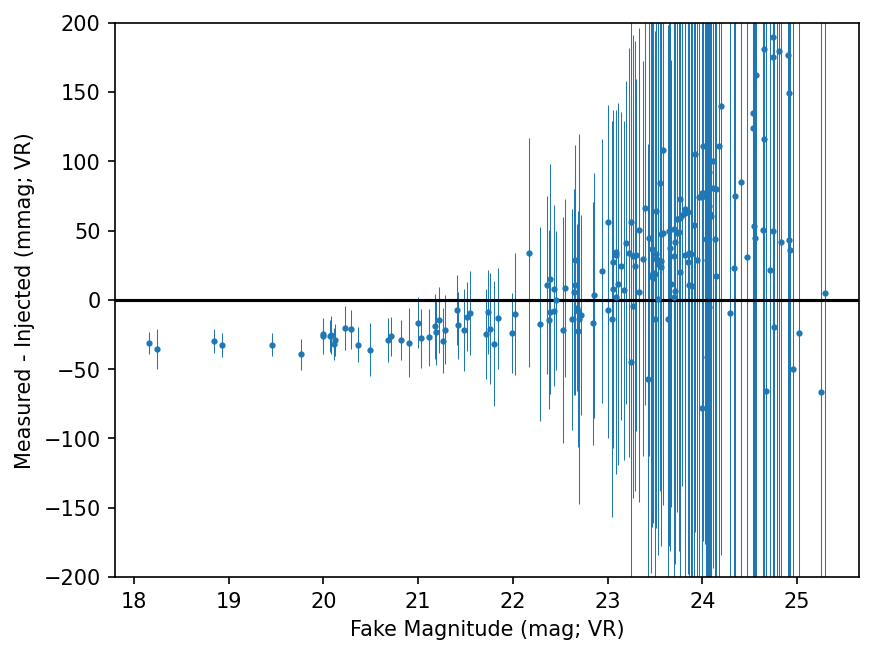

In [152]:
fig = plt.figure(dpi=150, facecolor='white')
plt.errorbar(m['x'], m['y']*1000, yerr=m['yerr']*1000, fmt='o', ms=2, lw=0.5)
plt.ylim(-200, 200)
plt.xlabel("Fake Magnitude (mag; VR)")
plt.ylabel("Measured - Injected (mmag; VR)")
plt.axhline(0, color='k')
plt.show()

In [106]:
m['x'].data, m['y'].data

(array([21.73338289, 23.77969623, 24.20088762, 22.42896981, 23.56605214,
        20.48988677, 23.96710846, 20.22898594, 20.07949698, 24.7560088 ,
        24.53305463, 20.29568581, 24.03701529, 22.65367263, 24.53022802,
        25.02389298, 23.75451099, 21.17825613, 25.29695235, 24.91583452,
        24.92493079, 24.06392864, 21.54837408, 23.06052599, 24.34151664,
        23.46258349, 23.70859854, 23.86143331, 24.55633073, 20.99873708,
        24.81219644, 23.50763123, 23.26665561, 24.12979384, 23.47380315,
        23.816514  , 23.22740005, 21.48136338, 21.22247469, 24.07055029,
        24.09008753, 23.94059261, 24.06770027, 22.39528141, 18.84022537,
        18.15873787, 23.05921344, 24.54526028, 24.78691883, 24.74184758,
        22.71949692, 23.655011  , 19.99681733, 23.52816011, 24.56750856,
        23.33122879, 21.02597702, 23.08387028, 22.69544661, 21.26487791,
        21.71234278, 21.18409077, 22.67493417, 23.04963555, 23.52777235,
        23.76392584, 22.39587014, 24.66592729, 23.6

In [127]:
c[0] * x**2 + c[1] * x + c[2]

array([-0.02961477, -0.03038748, -0.03110954, -0.03178096, -0.03240172,
       -0.03297184, -0.03349132, -0.03396014, -0.03437832, -0.03474585,
       -0.03506273, -0.03532896, -0.03554455, -0.03570949, -0.03582378,
       -0.03588742, -0.03590042, -0.03586276, -0.03577446, -0.03563552,
       -0.03544592, -0.03520568, -0.03491479, -0.03457325, -0.03418106,
       -0.03373823, -0.03324475, -0.03270062, -0.03210584, -0.03146042,
       -0.03076435, -0.03001763, -0.02922026, -0.02837225, -0.02747358,
       -0.02652427, -0.02552432, -0.02447371, -0.02337246, -0.02222056,
       -0.02101801, -0.01976481, -0.01846097, -0.01710648, -0.01570134,
       -0.01424555, -0.01273912, -0.01118204, -0.00957431, -0.00791593,
       -0.00620691, -0.00444723, -0.00263691, -0.00077595,  0.00113567,
        0.00309793,  0.00511084,  0.0071744 ,  0.00928861,  0.01145346,
        0.01366896,  0.01593511,  0.01825191,  0.02061935,  0.02303745,
        0.02550619,  0.02802557,  0.03059561,  0.03321629,  0.03

In [126]:
c[0] * x**(2 - 0) + c[1] * x**(2 - 1) + c[2] * x**(2 - 2)

array([-0.02961477, -0.03038748, -0.03110954, -0.03178096, -0.03240172,
       -0.03297184, -0.03349132, -0.03396014, -0.03437832, -0.03474585,
       -0.03506273, -0.03532896, -0.03554455, -0.03570949, -0.03582378,
       -0.03588742, -0.03590042, -0.03586276, -0.03577446, -0.03563552,
       -0.03544592, -0.03520568, -0.03491479, -0.03457325, -0.03418106,
       -0.03373823, -0.03324475, -0.03270062, -0.03210584, -0.03146042,
       -0.03076435, -0.03001763, -0.02922026, -0.02837225, -0.02747358,
       -0.02652427, -0.02552432, -0.02447371, -0.02337246, -0.02222056,
       -0.02101801, -0.01976481, -0.01846097, -0.01710648, -0.01570134,
       -0.01424555, -0.01273912, -0.01118204, -0.00957431, -0.00791593,
       -0.00620691, -0.00444723, -0.00263691, -0.00077595,  0.00113567,
        0.00309793,  0.00511084,  0.0071744 ,  0.00928861,  0.01145346,
        0.01366896,  0.01593511,  0.01825191,  0.02061935,  0.02303745,
        0.02550619,  0.02802557,  0.03059561,  0.03321629,  0.03

array([-0.02961477, -0.03038748, -0.03110954, -0.03178096, -0.03240172,
       -0.03297184, -0.03349132, -0.03396014, -0.03437832, -0.03474585,
       -0.03506273, -0.03532896, -0.03554455, -0.03570949, -0.03582378,
       -0.03588742, -0.03590042, -0.03586276, -0.03577446, -0.03563552,
       -0.03544592, -0.03520568, -0.03491479, -0.03457325, -0.03418106,
       -0.03373823, -0.03324475, -0.03270062, -0.03210584, -0.03146042,
       -0.03076435, -0.03001763, -0.02922026, -0.02837225, -0.02747358,
       -0.02652427, -0.02552432, -0.02447371, -0.02337246, -0.02222056,
       -0.02101801, -0.01976481, -0.01846097, -0.01710648, -0.01570134,
       -0.01424555, -0.01273912, -0.01118204, -0.00957431, -0.00791593,
       -0.00620691, -0.00444723, -0.00263691, -0.00077595,  0.00113567,
        0.00309793,  0.00511084,  0.0071744 ,  0.00928861,  0.01145346,
        0.01366896,  0.01593511,  0.01825191,  0.02061935,  0.02303745,
        0.02550619,  0.02802557,  0.03059561,  0.03321629,  0.03

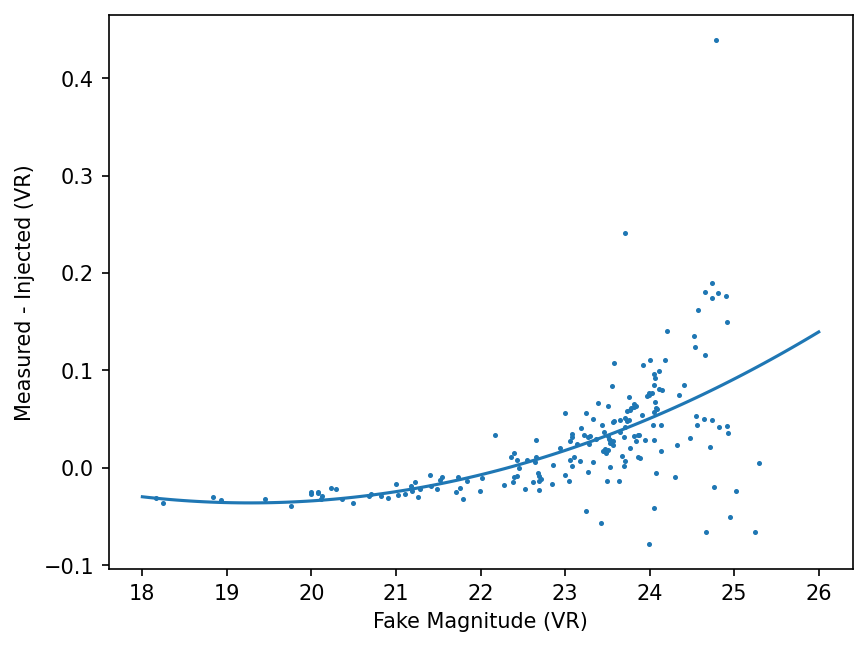

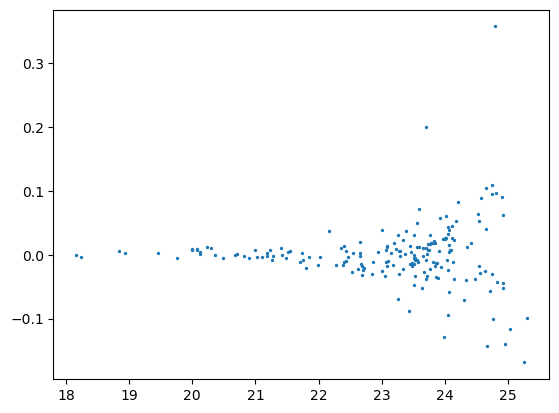

In [154]:

_x = m['x']
_y = m['y']
_m = _x > 17
c = np.polyfit(_x[_m], _y[_m], deg=2)
x = np.linspace(18, 26, 100)
y = np.sum([c[i] * x**(len(c) - 1 - i) for i in range(len(c))], axis=0)

fig = plt.figure(dpi=150)
# plt.errorbar(m['x'], m['y'], yerr=m['yerr'], fmt='o', ms=2, lw=0.5)
plt.scatter(m['x'], m['y'], s=2)
plt.plot(x, y)
# plt.ylim(-0.2, 0.2)
plt.xlabel("Fake Magnitude (VR)")
plt.ylabel("Measured - Injected (VR)")
plt.show()
plt.scatter(m['x'], m['y'] - np.sum([c[i] * m['x']**(len(c) - 1 - i) for i in range(len(c))], axis=0), s=2)
plt.show()

In [61]:
c = load_summary("new", 1, 3.0, "regular", "asteroid")[27]
t = make_object_table(c)
t

<Table length=104>
expnum         x                  y          ... STREAK SUSPECT UNMASKEDNAN
int64       float64            float64       ...  bool    bool      bool   
------ ------------------ ------------------ ... ------ ------- -----------
845872 154.22958355967603   3066.83254286595 ...  False   False       False
845873  147.5866916998242 3063.6966486568954 ...  False   False       False
845874 148.31619831655348  3065.473199099264 ...  False   False       False
845875 152.14753716797588 3068.6165222761274 ...  False   False       False
845876 151.33170399172002 3068.5758062376535 ...  False   False       False
845877 151.95116345256395 3063.8484019936827 ...  False   False       False
845878 149.22476803137374  3057.034006662882 ...  False   False       False
845879  150.0062912845582 3058.7325500201373 ...  False   False       False
845880  151.0737202789877   3053.32773203137 ...  False   False       False
845881 148.70874734315066  3050.174215590052 ...  False   False       False
   ...                ...                ... ...    ...     ...         ...
845966 221.59500644714296 2754.2043823734457 ...  False   False       False
845967 219.83812560762362 2762.2195005429066 ...  False   False       False
845968 213.75087661922214 2752.6646924107094 ...  False   False       False
845969 217.98887073096853 2754.9056632936313 ...  False   False       False
845970 212.35866166617143 2746.1899922084262 ...  False   False       False
845971  212.4836846404495 2739.1220628335277 ...  False   False       False
845972 211.18506315549246 2747.2758286199814 ...  False   False       False
845973 217.48388349689378 2740.8130443254904 ...  False   False       False
845974 209.59627411145163  2729.850060773764 ...  False   False       False
845975 210.31768244423222 2731.9877119676266 ...  False   False       False

In [55]:
-2/5 * np.log10(t['flux'])

<Column name='flux' dtype='float64' length=104>
  -1.46018680147525
-1.4739040877842922
-1.4695347606357576
-1.4728483517912228
-1.4598156302432423
-1.4625553162158604
-1.4604334862165071
-1.4639781451662663
-1.4554808548175273
-1.4552101701959417
-1.4717229232110045
-1.4491466553435959
                ...
-1.4566964975558658
-1.4537120777491095
 -1.456718609697707
-1.4561368434866213
-1.4630122619689148
-1.4671345361946022
 -1.469007905857177
-1.4669858687078126
-1.4660103209718875
-1.4594489437022864
-1.4659059273768702
-1.4635550137850808